# US Geospatial and Temporal Pollution Analysis

####Name: Harshit Shrimali

#### Dataset Background 

Data Source: Data was sourced from Kaggle (https://www.kaggle.com/sogun3/uspollution)

 Data Lineage: Kaggle data was sourced from US EPA Air Quality database (https://www.epa.gov/outdoor-air-quality-data/download-daily-data)

####Dataset Content
Carbon Monoxide (CO), Nitrogen Dioxide (NO2), Sulfur Dioxide  (SO2), and Ozone (O3 ) pollution measurements taken at sites across the United States

Time series data of pollution measurements for the years 2000-2016

CO, NO2, SO2, and O3 Air Quality Index (AQI) values

####Problem Statement: What are the trends in EPA pollution measurements over time and what temporal and geospatial patterns can be deduced from the data?

####Notes: 

mlxtend and fbprophet libraries will need to be installed in the Cluster

Use 10.1 Databricks runtime version

In [0]:
%fs ls /FileStore/tables/pollution_us_2000_2016.csv

path name size dbfs:/FileStore/tables/pollution_us_2000_2016.csv pollution_us_2000_2016.csv 400946718

In [0]:
from pyspark.sql.types import *
from pyspark.sql.functions import *

data_file = '/FileStore/tables/pollution_us_2000_2016.csv'

In [0]:
data_schema = StructType([StructField('Index', IntegerType(), True), StructField('State Code', IntegerType(), True),      
                     StructField('County Code', IntegerType(), True),
                     StructField('SiteNum', IntegerType(), True),
                     StructField('Address', StringType(), True),                  
                     StructField('State', StringType(), True),      
                     StructField('County', StringType(), True),
                     StructField('City', StringType(), True),
                     StructField('Date', DateType(), True),
                     StructField('NO2 Units', StringType(), True),
                     StructField('NO2 Mean', FloatType(), True),
                     StructField('NO2 Max Value', FloatType(), True),       
                     StructField('NO2 Max Hour', IntegerType(),True),       
                     StructField('NO2 AQI', IntegerType(), True),                 
                     StructField('O3 Units', StringType(), True),       
                     StructField('O3 Mean', FloatType(), True),       
                     StructField('O3 Max Value', FloatType(), True),       
                     StructField('O3 Max Hour', IntegerType(), True),
                     StructField('O3 AQI', IntegerType(), True),
                     StructField('SO2 Units', StringType(), True),
                     StructField('SO2 Mean', FloatType(), True),
                     StructField('SO2 Max Value', FloatType(), True),       
                     StructField('SO2 Max Hour', IntegerType(),True),       
                     StructField('SO2 AQI', FloatType(), True),
                     StructField('CO Units', StringType(), True),
                     StructField('CO Mean', FloatType(), True),
                     StructField('CO Max Value', FloatType(), True),       
                     StructField('CO Max Hour', IntegerType(),True),       
                     StructField('CO AQI', FloatType(), True)])

In [0]:
df = spark.read.csv(data_file, header=True, schema=data_schema)

In [0]:
df.cache()

Out[4]: DataFrame[Index: int, State Code: int, County Code: int, SiteNum: int, Address: string, State: string, County: string, City: string, Date: date, NO2 Units: string, NO2 Mean: float, NO2 Max Value: float, NO2 Max Hour: int, NO2 AQI: int, O3 Units: string, O3 Mean: float, O3 Max Value: float, O3 Max Hour: int, O3 AQI: int, SO2 Units: string, SO2 Mean: float, SO2 Max Value: float, SO2 Max Hour: int, SO2 AQI: float, CO Units: string, CO Mean: float, CO Max Value: float, CO Max Hour: int, CO AQI: float]

In [0]:
df.printSchema()

root
 |-- Index: integer (nullable = true)
 |-- State Code: integer (nullable = true)
 |-- County Code: integer (nullable = true)
 |-- SiteNum: integer (nullable = true)
 |-- Address: string (nullable = true)
 |-- State: string (nullable = true)
 |-- County: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Date: date (nullable = true)
 |-- NO2 Units: string (nullable = true)
 |-- NO2 Mean: float (nullable = true)
 |-- NO2 Max Value: float (nullable = true)
 |-- NO2 Max Hour: integer (nullable = true)
 |-- NO2 AQI: integer (nullable = true)
 |-- O3 Units: string (nullable = true)
 |-- O3 Mean: float (nullable = true)
 |-- O3 Max Value: float (nullable = true)
 |-- O3 Max Hour: integer (nullable = true)
 |-- O3 AQI: integer (nullable = true)
 |-- SO2 Units: string (nullable = true)
 |-- SO2 Mean: float (nullable = true)
 |-- SO2 Max Value: float (nullable = true)
 |-- SO2 Max Hour: integer (nullable = true)
 |-- SO2 AQI: float (nullable = true)
 |-- CO Units: string (nul

In [0]:
display(df)

Index State Code County Code SiteNum Address State County City Date NO2 Units NO2 Mean NO2 Max Value NO2 Max Hour NO2 AQI O3 Units O3 Mean O3 Max Value O3 Max Hour O3 AQI SO2 Units SO2 Mean SO2 Max Value SO2 Max Hour SO2 AQI CO Units CO Mean CO Max Value CO Max Hour CO AQI 0 4 13 3002 1645 E ROOSEVELT ST-CENTRAL PHOENIX STN Arizona Maricopa Phoenix 2000-01-01 Parts per billion 19.041668 49.0 19 46 Parts per million 0.0225 0.04 10 34 Parts per billion 3.0 9.0 21 13.0 Parts per million 1.145833 4.2 21 null 1 4 13 3002 1645 E ROOSEVELT ST-CENTRAL PHOENIX STN Arizona Maricopa Phoenix 2000-01-01 Parts per billion 19.041668 49.0 19 46 Parts per million 0.0225 0.04 10 34 Parts per billion 3.0 9.0 21 13.0 Parts per million 0.878947 2.2 23 25.0 2 4 13 3002 1645 E ROOSEVELT ST-CENTRAL PHOENIX STN Arizona Maricopa Phoenix 2000-01-01 Parts per billion 19.041668 49.0 19 46 Parts per million 0.0225 0.04 10 34 Parts per billion 2.975 6.6 23 null Parts per million 1.145833 4.2 21 null 3 4 13 3002 1645 E ROOSEVELT ST-CENTRAL PHOENIX STN Arizona Maricopa Phoenix 2000-01-01 Parts per billion 19.041668 49.0 19 46 Parts per million 0.0225 0.04 10 34 Parts per billion 2.975 6.6 23 null Parts per million 0.878947 2.2 23 25.0 4 4 13 3002 1645 E ROOSEVELT ST-CENTRAL PHOENIX STN Arizona Maricopa Phoenix 2000-01-02 Parts per billion 22.958332 36.0 19 34 Parts per million 0.013375 0.032 10 27 Parts per billion 1.958333 3.0 22 4.0 Parts per million 0.85 1.6 23 null 5 4 13 3002 1645 E ROOSEVELT ST-CENTRAL PHOENIX STN Arizona Maricopa Phoenix 2000-01-02 Parts per billion 22.958332 36.0 19 34 Parts per million 0.013375 0.032 10 27 Parts per billion 1.958333 3.0 22 4.0 Parts per million 1.066667 2.3 0 26.0 6 4 13 3002 1645 E ROOSEVELT ST-CENTRAL PHOENIX STN Arizona Maricopa Phoenix 2000-01-02 Parts per billion 22.958332 36.0 19 34 Parts per million 0.013375 0.032 10 27 Parts per billion 1.9375 2.6 23 null Parts per million 0.85 1.6 23 null 7 4 13 3002 1645 E ROOSEVELT ST-CENTRAL PHOENIX STN Arizona Maricopa Phoenix 2000-01-02 Parts per billion 22.958332 36.0 19 34 Parts per million 0.013375 0.032 10 27 Parts per billion 1.9375 2.6 23 null Parts per million 1.066667 2.3 0 26.0 8 4 13 3002 1645 E ROOSEVELT ST-CENTRAL PHOENIX STN Arizona Maricopa Phoenix 2000-01-03 Parts per billion 38.125 51.0 8 48 Parts per million 0.007958 0.016 9 14 Parts per billion 5.25 11.0 19 16.0 Parts per million 1.929167 4.4 8 null 9 4 13 3002 1645 E ROOSEVELT ST-CENTRAL PHOENIX STN Arizona Maricopa Phoenix 2000-01-03 Parts per billion 38.125 51.0 8 48 Parts per million 0.007958 0.016 9 14 Parts per billion 5.25 11.0 19 16.0 Parts per million 1.7625 2.5 8 28.0 10 4 13 3002 1645 E ROOSEVELT ST-CENTRAL PHOENIX STN Arizona Maricopa Phoenix 2000-01-03 Parts per billion 38.125 51.0 8 48 Parts per million 0.007958 0.016 9 14 Parts per billion 5.2 8.3 20 null Parts per million 1.929167 4.4 8 null 11 4 13 3002 1645 E ROOSEVELT ST-CENTRAL PHOENIX STN Arizona Maricopa Phoenix 2000-01-03 Parts per billion 38.125 51.0 8 48 Parts per million 0.007958 0.016 9 14 Parts per billion 5.2 8.3 20 null Parts per million 1.7625 2.5 8 28.0 12 4 13 3002 1645 E ROOSEVELT ST-CENTRAL PHOENIX STN Arizona Maricopa Phoenix 2000-01-04 Parts per billion 40.26087 74.0 8 72 Parts per million 0.014167 0.033 9 28 Parts per billion 7.083333 16.0 8 23.0 Parts per million 1.991667 5.1 21 null 13 4 13 3002 1645 E ROOSEVELT ST-CENTRAL PHOENIX STN Arizona Maricopa Phoenix 2000-01-04 Parts per billion 40.26087 74.0 8 72 Parts per million 0.014167 0.033 9 28 Parts per billion 7.083333 16.0 8 23.0 Parts per million 1.829167 3.0 23 34.0 14 4 13 3002 1645 E ROOSEVELT ST-CENTRAL PHOENIX STN Arizona Maricopa Phoenix 2000-01-04 Parts per billion 40.26087 74.0 8 72 Parts per million 0.014167 0.033 9 28 Parts per billion 7.05 12.6 8 null Parts per million 1.991667 5.1 21 null 15 4 13 3002 1645 E ROOSEVELT ST-CENTRAL PHOENIX STN Arizona Maricopa Phoenix 2000-01-04 Parts per billion 40.26087 74.0 8 72 Parts per million 0.014167 0.033 9 2

In [0]:
from pyspark.sql.functions import when, count, col
df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]).show()

+-----+----------+-----------+-------+-------+-----+------+----+----+---------+--------+-------------+------------+-------+--------+-------+------------+-----------+------+---------+--------+-------------+------------+-------+--------+-------+------------+-----------+------+
|Index|State Code|County Code|SiteNum|Address|State|County|City|Date|NO2 Units|NO2 Mean|NO2 Max Value|NO2 Max Hour|NO2 AQI|O3 Units|O3 Mean|O3 Max Value|O3 Max Hour|O3 AQI|SO2 Units|SO2 Mean|SO2 Max Value|SO2 Max Hour|SO2 AQI|CO Units|CO Mean|CO Max Value|CO Max Hour|CO AQI|
+-----+----------+-----------+-------+-------+-----+------+----+----+---------+--------+-------------+------------+-------+--------+-------+------------+-----------+------+---------+--------+-------------+------------+-------+--------+-------+------------+-----------+------+
|    0|         0|          0|      0|      0|    0|     0|   0|   0|        0|       0|            0|           0|      0|       0|      0|           0|          0|     0|

In [0]:
display(df.select("City").where(col("City").isNotNull()).groupBy("City").count().orderBy("count", ascending=False))

City count Not in a city 138411 New York 46887 Los Angeles 42241 Phoenix 37912 El Paso 36908 North Little Rock 35332 Houston 33626 Charlotte 32012 Rubidoux 30178 San Diego 29994 Davenport 28954 Washington 25696 Long Beach 25104 Concord 23686 Vallejo 23678 Capitan 23586 Dallas 23406 Bethel Island 23396 Winter Park 23346 Baton Rouge 23330 Victorville 23279 Tucson 23254 Lompoc 23190 Vandenberg Air Force Base 22932 Calexico 22420 Kansas City 22046 San Pablo 21960 Portland 21942 Costa Mesa 21606 Boston 21572 Welby 20976 East Saint Louis 20680 Philadelphia 20102 Arden-Arcade 19878 Burbank 18870 Pittsburgh 18380 Holtsville 18346 Camden 17198 Charleroi 15970 York 15768 Johnstown 15586 Cleveland 15386 Fresno 15302 Northbrook 14944 Chula Vista 14612 San Francisco 14444 Indianapolis (Remainder) 13926 Presque Isle 13475 Goleta 13290 Essex 13174 Pittsburg 13076 Bristol 12798 Waco 12480 Eureka 12200 New Haven 12017 Tulsa 11302 St. Louis 11162 Erie 11156 Cicero 10808 Fontana 10694 San Jose 10436 Des Moines 10256 Oakland 9746 Newark 9534 Denver 9455 Scottsdale 8674 Freemansburg 7692 Deer Park 7676 New Castle 7612 Altoona 7580 Lancaster 7546 Greensburg 7496 Beaver Falls 7456 Norristown 7422 Beltsville 7384 Cornwall 7338 Scranton 7310 Manchester 7278 Reno 7274 Albuquerque 7130 Sioux Falls 6912 Park Hill 6866 Salt Lake City 6580 El Cajon 6504 East Hartford 6376 East Providence 6324 Hawthorne 6046 Oklahoma City 6024 East Highland Park 5976 Alexandria 5876 McLean 5604 Cincinnati 5480 Reading 5286 Cupertino 4828 Hampton 4724 Detroit 4658 Berkeley 4460 Mexicali 4350 Westport 4202 Annandale 4042 Louisville 3888 Miami 3740 Wilmington 3630 San Antonio 3574 Blaine 3558 Cherry Tree 3542 Grand Rapids 3524 Breckenridge Hills 3432 Tijuana 3424 Ashland 3422 Raleigh 3172 Lexington-Fayette (corporate name for Lexington) 3154 Birmingham 3126 Grantsville 2980 Ponca City 2946 Valrico 2572 Benicia 2560 Calumet City (PU RR name Calumet Park (sta.)) 2552 Boulder City 2424 Wilkes-Barre 2254 Austin 2170 Vinton 2164 Fairbanks 1974 Winston-Salem 1942 Crockett 1892 Rosarito 1732 Sunset Hills 1726 Milwaukee 1516 Seven Corners 1446 Henderson 1430 Paducah 1426 Riverton 1396 Rochester 1164 Chicago 1132 West Los Angeles 1120 Seattle 962 Athens 908 Ferguson 866 Ladue 866 St. Ann 860 Kenner 544 Bakersfield 434 Dentsville (Dents) 116 Roosevelt 104

In [0]:
display(df.select("State").where(col("State").isNotNull()).groupBy('State').count().orderBy("count", ascending=False))

State count California 576142 Pennsylvania 188892 Texas 123208 New York 70487 Arizona 69840 Illinois 50116 North Carolina 37126 Virginia 36422 Arkansas 35332 Colorado 35188 Oklahoma 34420 Kansas 31480 Connecticut 29933 New Jersey 26732 Florida 25918 Iowa 25850 District Of Columbia 25696 Louisiana 23874 Maine 23623 Maryland 23538 Ohio 22934 Massachusetts 21572 Hawaii 20276 Missouri 19778 Kentucky 14686 Indiana 13926 Wyoming 13048 Oregon 11794 North Dakota 11018 Nevada 9698 Country Of Mexico 9506 New Hampshire 9294 Utah 8668 South Dakota 8316 Michigan 8182 Georgia 7722 New Mexico 7130 South Carolina 6536 Rhode Island 6324 Tennessee 5842 Delaware 3630 Minnesota 3558 Alabama 3126 Alaska 1974 Idaho 1828 Wisconsin 1516 Washington 962

In [0]:
print((df.count(), len(df.columns)))

(1746661, 29)


In [0]:
df = df.filter((df.City != 'Not in a city') & (df.State != 'Country Of Mexico'))

In [0]:
df.agg({"Date": "max"}).collect()[0]

Out[12]: Row(max(Date)=datetime.date(2016, 5, 31))

In [0]:
from pyspark.sql.functions import when

imputeCols = [
  "SO2 AQI",
  "CO AQI",
]

In [0]:
from pyspark.ml.feature import Imputer

imputer = Imputer(strategy="mean", inputCols=imputeCols, outputCols=imputeCols)

df = imputer.fit(df).transform(df)

In [0]:
display(df.select([count(when(isnull(c), c)).alias(c) for c in df.columns]))

Index State Code County Code SiteNum Address State County City Date NO2 Units NO2 Mean NO2 Max Value NO2 Max Hour NO2 AQI O3 Units O3 Mean O3 Max Value O3 Max Hour O3 AQI SO2 Units SO2 Mean SO2 Max Value SO2 Max Hour SO2 AQI CO Units CO Mean CO Max Value CO Max Hour CO AQI 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

# Data Exploration

####Correlation Matrix

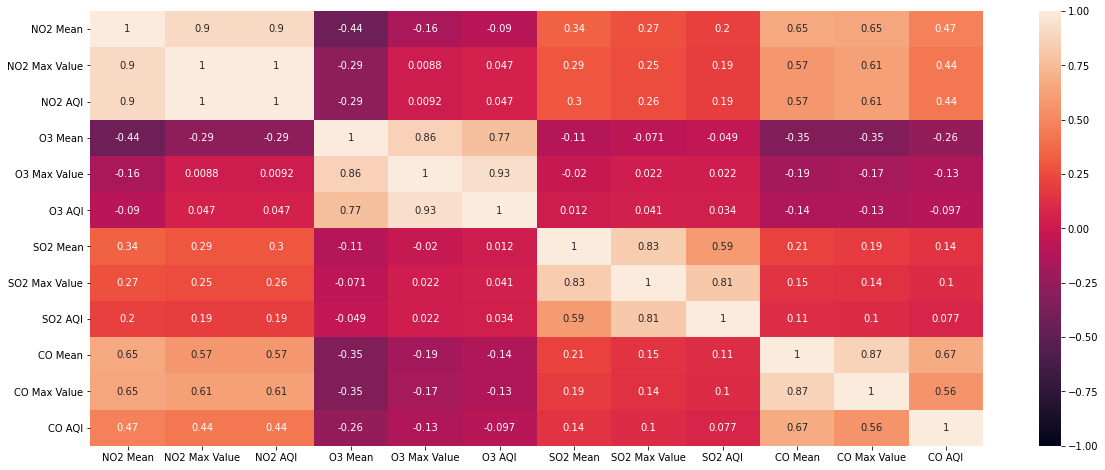

In [0]:
# Correlation matrix displaying correlation between features in the dataset

import matplotlib.pyplot as plt
import seaborn as sns

# Source: https://sparkbyexamples.com/pyspark/convert-pyspark-dataframe-to-pandas/
pandasDF = df.toPandas()
finalDF = pandasDF[['NO2 Mean', 'NO2 Max Value', 'NO2 AQI', 'O3 Mean', 'O3 Max Value', 'O3 AQI', 'SO2 Mean', 'SO2 Max Value', 
                   'SO2 AQI', 'CO Mean', 'CO Max Value', 'CO AQI']]
# Remove Index, State Code, County code, sitenum, max hour cols

# Source: https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(finalDF.corr(), vmin=-1, vmax=1, annot=True)

####Scatterplot Matrix

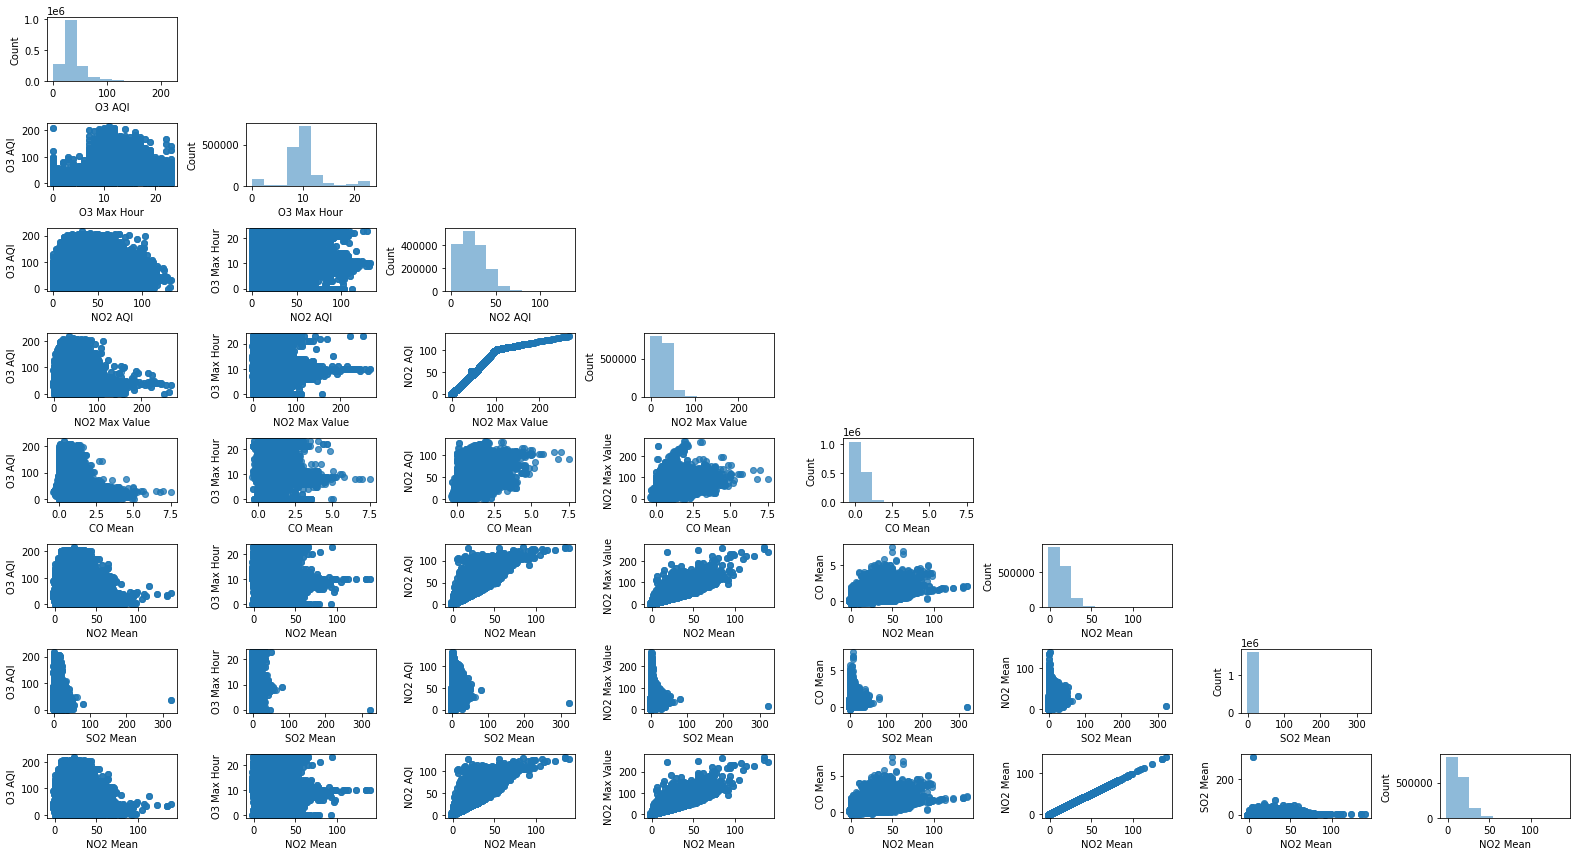

In [0]:
# Scatterplot matrix showing relationships between data features

cols = ['O3 AQI', 'O3 Max Hour', 'NO2 AQI', 'NO2 Max Value', 'CO Mean', 'NO2 Mean', 'SO2 Mean', 'NO2 Mean']
from mlxtend.plotting import scatterplotmatrix
scatterplotmatrix(pandasDF[cols].values, figsize= (22,12), names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

# Geospacial and Temporal Analysis

In [0]:
from pyspark.sql.functions import *

# Register the DataFrame as table 'static_counts'
df.createOrReplaceTempView("pollution")

#### Distribution of Daily Max O3 Concentration (ppm)

In [0]:
%sql select `O3 Max Value` from pollution

O3 Max Value 0.04 0.04 0.04 0.04 0.032 0.032 0.032 0.032 0.016 0.016 0.016 0.016 0.033 0.033 0.033 0.033 0.012 0.012 0.012 0.012 0.025 0.025 0.025 0.025 0.024 0.024 0.024 0.024 0.02 0.02 0.02 0.02 0.022 0.022 0.022 0.022 0.015 0.015 0.015 0.015 0.017 0.017 0.017 0.017 0.014 0.014 0.014 0.014 0.01 0.01 0.01 0.01 0.018 0.018 0.018 0.018 0.022 0.022 0.022 0.022 0.023 0.023 0.023 0.023 0.015 0.015 0.015 0.015 0.01 0.01 0.01 0.01 0.013 0.013 0.013 0.013 0.016 0.016 0.016 0.016 0.014 0.014 0.014 0.014 0.02 0.02 0.02 0.02 0.036 0.036 0.036 0.036 0.023 0.023 0.023 0.023 0.02 0.02 0.02 0.02 0.035 0.035 0.035 0.035 0.028 0.028 0.028 0.028 0.027 0.027 0.027 0.027 0.037 0.037 0.037 0.037 0.035 0.035 0.035 0.035 0.03 0.03 0.03 0.03 0.039 0.039 0.039 0.039 0.036 0.036 0.036 0.036 0.032 0.032 0.032 0.032 0.022 0.022 0.022 0.022 0.039 0.039 0.039 0.039 0.043 0.043 0.043 0.043 0.033 0.033 0.033 0.033 0.019 0.019 0.019 0.019 0.027 0.027 0.027 0.027 0.033 0.033 0.033 0.033 0.029 0.029 0.029 0.029 0.04 0.04 0.04 0.04 0.041 0.041 0.041 0.041 0.031 0.031 0.031 0.031 0.029 0.029 0.029 0.029 0.022 0.022 0.022 0.022 0.044 0.044 0.044 0.044 0.028 0.028 0.028 0.028 0.025 0.025 0.025 0.025 0.028 0.028 0.028 0.028 0.031 0.031 0.031 0.031 0.037 0.037 0.037 0.037 0.029 0.029 0.029 0.029 0.042 0.042 0.042 0.042 0.038 0.038 0.038 0.038 0.043 0.043 0.043 0.043 0.046 0.046 0.046 0.046 0.046 0.046 0.046 0.046 0.04 0.04 0.04 0.04 0.042 0.042 0.042 0.042 0.04 0.04 0.04 0.04 0.044 0.044 0.044 0.044 0.038 0.038 0.038 0.038 0.035 0.035 0.035 0.035 0.034 0.034 0.034 0.034 0.034 0.034 0.034 0.034 0.047 0.047 0.047 0.047 0.042 0.042 0.042 0.042 0.04 0.04 0.04 0.04 0.054 0.054 0.054 0.054 0.053 0.053 0.053 0.053 0.051 0.051 0.051 0.051 0.049 0.049 0.049 0.049 0.051 0.051 0.051 0.051 0.049 0.049 0.049 0.049 0.051 0.051 0.051 0.051 0.05 0.05 0.05 0.05 0.059 0.059 0.059 0.059 0.044 0.044 0.044 0.044 0.041 0.041 0.041 0.041 0.045 0.045 0.045 0.045 0.048 0.048 0.048 0.048 0.048 0.048 0.048 0.048 0.065 0.065 0.065 0.065 0.062 0.062 0.062 0.062 0.043 0.043 0.043 0.043 0.036 0.036 0.036 0.036 0.057 0.057 0.057 0.057 0.046 0.046 0.046 0.046 0.039 0.039 0.039 0.039 0.051 0.051 0.051 0.051 0.058 0.058 0.058 0.058 0.05 0.05 0.05 0.05 0.054 0.054 0.054 0.054 0.029 0.029 0.029 0.029 0.048 0.048 0.051 0.051 0.053 0.053 0.053 0.053 0.046 0.046 0.046 0.046 0.06 0.06 0.06 0.06 0.043 0.043 0.043 0.043 0.055 0.055 0.055 0.055 0.053 0.053 0.053 0.053 0.043 0.043 0.043 0.043 0.052 0.052 0.052 0.052 0.061 0.061 0.061 0.061 0.059 0.059 0.059 0.059 0.046 0.046 0.046 0.046 0.064 0.064 0.064 0.064 0.064 0.064 0.064 0.064 0.064 0.064 0.064 0.064 0.056 0.056 0.056 0.056 0.059 0.059 0.059 0.059 0.054 0.054 0.054 0.054 0.047 0.047 0.047 0.047 0.071 0.071 0.071 0.071 0.073 0.073 0.073 0.073 0.072 0.072 0.072 0.072 0.067 0.067 0.067 0.067 0.062 0.062 0.062 0.062 0.06 0.06 0.06 0.06 0.043 0.043 0.043 0.043 0.046 0.046 0.046 0.046 0.046 0.046 0.046 0.046 0.055 0.055 0.055 0.055 0.058 0.058 0.058 0.058 0.038 0.038 0.038 0.038 0.066 0.066 0.066 0.066 0.074 0.074 0.074 0.074 0.076 0.076 0.076 0.076 0.07 0.07 0.07 0.07 0.049 0.049 0.049 0.049 0.057 0.057 0.057 0.057 0.062 0.062 0.062 0.062 0.053 0.053 0.053 0.053 0.07 0.07 0.07 0.07 0.055 0.055 0.055 0.055 0.043 0.043 0.043 0.043 0.05 0.05 0.05 0.05 0.06 0.06 0.06 0.06 0.067 0.067 0.067 0.067 0.06 0.06 0.06 0.06 0.048 0.048 0.048 0.048 0.052 0.052 0.052 0.052 0.041 0.041 0.041 0.041 0.042 0.042 0.042 0.042 0.045 0.045 0.045 0.045 0.057 0.057 0.057 0.057 0.064 0.064 0.064 0.064 0.069 0.069 0.069 0.069 0.054 0.054 0.054 0.054 0.032 0.032 0.032 0.032 0.047 0.047 0.047 0.047 0.053 0.053 0.053 0.053 0.059 0.059 0.059 0.059 0.052 0.052 0.052 0.052 0.054 0.054 0.054 0.054 0.055 0.055 0.055 0.055 0.048 0.048 0.048 0.048 0.049 0.049 0.049 0.049 0.054 0.054 0.054 0.054 0.049 0.049 0.049 0.049 0.035 0.035 0.035 0.035 0.03 0.03 0.03 0.03 0.059 0.059 0.059 0.059 0.025 0.025 0.025 0.025 0.038 0.038 0.038 0.038 0.024 0.024 0.024 0.024 0.048 0.048 0.048 0.048 0.036 0.036 0.0

#### Distribution of Daily Max CO Concentration (ppm)

In [0]:
%sql select `CO Max Value` from pollution

CO Max Value 4.2 2.2 4.2 2.2 1.6 2.3 1.6 2.3 4.4 2.5 4.4 2.5 5.1 3.0 5.1 3.0 5.6 3.7 5.6 3.7 6.3 3.6 6.3 3.6 6.4 3.5 6.4 3.5 6.6 5.1 6.6 5.1 3.9 2.8 3.9 2.8 5.9 3.7 5.9 3.7 6.9 4.5 6.9 4.5 6.3 4.2 6.3 4.2 7.0 4.6 7.0 4.6 8.1 5.3 8.1 5.3 7.2 4.5 7.2 4.5 3.7 4.8 3.7 4.8 5.7 3.9 5.7 3.9 6.9 4.9 6.9 4.9 5.9 4.9 5.9 4.9 4.6 4.1 4.6 4.1 6.5 3.5 6.5 3.5 5.3 3.8 5.3 3.8 4.6 4.0 4.6 4.0 4.8 3.3 4.8 3.3 2.2 2.9 2.2 2.9 1.3 1.4 1.3 1.4 2.9 1.6 2.9 1.6 4.7 1.9 4.7 1.9 5.8 3.1 5.8 3.1 4.1 3.8 4.1 3.8 3.3 2.4 3.3 2.4 3.8 2.6 3.8 2.6 5.1 2.5 5.1 2.5 5.1 3.2 5.1 3.2 8.0 4.2 8.0 4.2 5.4 5.0 5.4 5.0 4.2 3.6 4.2 3.6 5.3 3.2 5.3 3.2 4.6 4.2 4.6 4.2 2.9 2.0 2.9 2.0 2.2 1.7 2.2 1.7 3.2 1.6 3.2 1.6 2.6 2.0 2.6 2.0 1.9 1.0 1.9 1.0 4.4 1.9 4.4 1.9 5.4 2.9 5.4 2.9 3.5 3.1 3.5 3.1 2.4 2.4 2.4 2.4 2.7 1.7 2.7 1.7 7.2 3.4 7.2 3.4 5.9 4.8 5.9 4.8 0.9 0.5 0.9 0.5 1.7 0.9 1.7 0.9 1.7 1.1 1.7 1.1 1.4 1.1 1.4 1.1 1.9 1.4 1.9 1.4 4.1 2.1 4.1 2.1 5.5 3.5 5.5 3.5 0.8 1.3 0.8 1.3 3.8 1.6 3.8 1.6 3.0 2.1 3.0 2.1 3.9 1.8 3.9 1.8 2.8 2.5 2.8 2.5 2.0 1.4 2.0 1.4 0.7 0.6 0.7 0.6 1.0 0.8 1.0 0.8 0.7 0.7 0.7 0.7 2.1 1.0 2.1 1.0 2.7 1.7 2.7 1.7 3.1 2.1 3.1 2.1 3.4 3.1 3.4 3.1 4.4 3.4 4.4 3.4 2.7 1.9 2.7 1.9 2.9 2.1 2.9 2.1 2.7 2.1 2.7 2.1 3.3 1.4 3.3 1.4 2.2 1.8 2.2 1.8 2.0 1.1 2.0 1.1 3.1 1.5 3.1 1.5 2.0 1.7 2.0 1.7 1.0 0.6 1.0 0.6 1.9 1.0 1.9 1.0 2.5 1.4 2.5 1.4 2.5 1.8 2.5 1.8 4.1 2.7 4.1 2.7 4.5 3.0 4.5 3.0 2.2 1.9 2.2 1.9 0.9 0.7 0.9 0.7 3.2 1.4 3.2 1.4 1.9 1.8 1.9 1.8 1.1 0.7 1.1 0.7 2.0 1.4 2.0 1.4 2.2 1.4 2.2 1.4 3.6 1.5 3.6 1.5 2.5 1.7 2.5 1.7 2.4 2.0 2.4 2.0 3.3 3.3 3.9 3.9 3.6 1.6 3.6 1.6 4.6 2.1 4.6 2.1 2.8 2.5 2.8 2.5 2.3 1.0 2.3 1.0 2.5 1.2 2.5 1.2 2.4 1.7 2.4 1.7 1.8 1.1 1.8 1.1 0.8 0.4 0.8 0.4 2.6 1.3 2.6 1.3 3.7 1.9 3.7 1.9 3.0 2.8 3.0 2.8 1.9 0.7 1.9 0.7 3.5 1.6 3.5 1.6 3.8 2.2 3.8 2.2 4.2 2.6 4.2 2.6 4.5 2.7 4.5 2.7 3.2 2.7 3.2 2.7 1.8 1.2 1.8 1.2 1.2 0.7 1.2 0.7 3.4 1.1 3.4 1.1 3.8 2.1 3.8 2.1 4.9 2.0 4.9 2.0 3.2 2.5 3.2 2.5 2.4 1.4 2.4 1.4 2.0 1.3 2.0 1.3 1.9 1.2 1.9 1.2 1.4 0.9 1.4 0.9 0.8 0.5 0.8 0.5 1.9 1.2 1.9 1.2 0.8 0.8 0.8 0.8 1.3 0.6 1.3 0.6 3.4 1.4 3.4 1.4 4.9 2.6 4.9 2.6 5.0 2.8 5.0 2.8 2.9 2.9 2.9 2.9 0.8 0.6 0.8 0.6 1.5 0.8 1.5 0.8 2.9 1.4 2.9 1.4 3.7 1.8 3.7 1.8 2.2 1.0 2.2 1.0 2.5 1.1 2.5 1.1 1.4 0.7 1.4 0.7 0.8 0.6 0.8 0.6 1.2 0.9 1.2 0.9 1.7 1.4 1.7 1.4 2.1 1.6 2.1 1.6 1.5 0.8 1.5 0.8 1.8 0.9 1.8 0.9 1.2 0.8 1.2 0.8 2.3 1.5 2.3 1.5 3.0 1.6 3.0 1.6 3.5 2.0 3.5 2.0 2.1 1.1 2.1 1.1 2.9 1.7 2.9 1.7 0.5 0.4 0.5 0.4 0.6 0.5 0.6 0.5 1.2 0.8 1.2 0.8 2.4 1.5 2.4 1.5 1.5 1.0 1.5 1.0 1.5 1.1 1.5 1.1 1.7 0.8 1.7 0.8 1.1 0.5 1.1 0.5 0.7 0.4 0.7 0.4 0.5 0.3 0.5 0.3 0.2 0.2 0.2 0.2 0.7 0.4 0.7 0.4 0.8 0.5 0.8 0.5 1.7 1.2 1.7 1.2 1.5 0.9 1.5 0.9 1.4 0.9 1.4 0.9 1.2 0.6 1.2 0.6 0.8 0.7 0.8 0.7 2.0 0.9 2.0 0.9 1.1 0.6 1.1 0.6 0.5 0.4 0.5 0.4 0.7 0.6 0.7 0.6 0.8 0.6 0.8 0.6 1.2 0.6 1.2 0.6 1.0 0.8 1.0 0.8 0.8 0.7 0.8 0.7 1.3 1.0 1.3 1.0 1.7 1.1 1.7 1.1 1.7 0.9 1.7 0.9 1.2 0.7 1.2 0.7 0.7 0.5 0.7 0.5 0.5 0.5 0.5 0.5 2.0 0.9 2.0 0.9 1.2 0.8 1.2 0.8 2.2 1.0 2.2 1.0 1.9 1.0 1.9 1.0 1.4 0.7 1.4 0.7 1.1 0.8 1.1 0.8 1.1 0.7 1.1 0.7 2.5 1.4 2.5 1.4 2.6 1.5 2.6 1.5 2.5 1.2 2.5 1.2 1.5 1.3 1.5 1.3 1.4 0.7 1.4 0.7 1.2 1.1 1.2 1.1 1.5 0.8 1.5 0.8 2.2 1.3 2.2 1.3 1.1 0.7 1.1 0.7 1.3 0.7 1.3 0.7 2.3 0.7 2.3 0.7 1.0 0.7 1.0 0.7 1.6 0.8 1.6 0.8 0.7 0.9 0.7 0.9 1.1 0.5 1.1 0.5 0.6 0.3 0.6 0.3 1.5 0.8 1.5 0.8 1.6 1.0 1.6 1.0 0.3 0.2 0.3 0.2 0.4 0.3 0.4 0.3 0.8 0.4 0.8 0.4 0.9 0.5 0.9 0.5 0.9 0.6 0.9 0.6 0.5 0.6 0.5 0.6 0.5 0.3 0.5 0.3 0.5 0.4 0.5 0.4 1.2 0.6 1.2 0.6 0.9 0.5 0.9 0.5 0.9 0.4 0.9 0.4 0.4 0.4 0.4 0.4 0.9 0.6 0.9 0.6 2.0 1.0 2.0 1.0 1.4 1.2 1.4 1.2 1.5 0.9 1.5 0.9 1.1 0.9 1.1 0.9 1.7 0.8 1.7 0.8 1.1 0.8 1.1 0.8 0.9 0.6 0.9 0.6 1.4 1.0 1.4 1.0 0.6 0.5 0.6 0.5 0.8 0.6 0.8 0.6 0.9 0.5 0.9 0.5 1.2 0.8 1.2 0.8 1.4 0.7 1.4 0.7 3.7 1.6 3.7 1.6 4.1 2.7 4.1 2.7 2.8 2.0 2.8 2.0 2.6 2.1 2.6 2.1 3.0 1.9 3.0 1.9 1.6 0.9 1.6 0.9 2.0 1.2 2.0 1.2 1.5 0.9 1.5 0.9 1.6 1.0 1.6 1.0 1.2 1.1 1.2 1.1 1.7 1.0 1.7 1.0 2.6 1.3 2.6 1.3 2.9 2.1 2.9 2.1 1.4 1.4 1.4 1.4 3.2 1.3 3.2 1.3 3.0

#### Distribution of Daily Max SO2 Concentration (ppm)

In [0]:
%sql select `SO2 Max Value` from pollution

SO2 Max Value 9.0 9.0 6.6 6.6 3.0 3.0 2.6 2.6 11.0 11.0 8.3 8.3 16.0 16.0 12.6 12.6 15.0 15.0 14.0 14.0 17.0 17.0 14.6 14.6 21.0 21.0 17.3 17.3 18.0 18.0 15.3 15.3 13.0 13.0 12.0 12.0 21.0 21.0 18.3 18.3 24.0 24.0 20.3 20.3 26.0 26.0 22.6 22.6 21.0 21.0 20.6 20.6 29.0 29.0 25.6 25.6 22.0 22.0 18.3 18.3 13.0 13.0 11.6 11.6 19.0 19.0 17.6 17.6 23.0 23.0 21.3 21.3 22.0 22.0 18.0 18.0 17.0 17.0 14.3 14.3 17.0 17.0 14.6 14.6 14.0 14.0 13.3 13.3 14.0 14.0 12.0 12.0 18.0 18.0 16.3 16.3 11.0 11.0 10.6 10.6 7.0 7.0 6.6 6.6 11.0 11.0 7.6 7.6 14.0 14.0 9.0 9.0 17.0 17.0 13.0 13.0 10.0 10.0 6.3 6.3 9.0 9.0 7.6 7.6 15.0 15.0 10.3 10.3 20.0 20.0 18.0 18.0 18.0 18.0 18.0 18.0 28.0 28.0 24.3 24.3 16.0 16.0 12.0 12.0 12.0 12.0 10.6 10.6 19.0 19.0 15.3 15.3 24.0 24.0 14.3 14.3 10.0 10.0 9.3 9.3 7.0 7.0 6.0 6.0 9.0 9.0 6.0 6.0 6.0 6.0 3.3 3.3 3.0 3.0 2.6 2.6 13.0 13.0 9.3 9.3 22.0 22.0 16.6 16.6 12.0 12.0 9.3 9.3 8.0 8.0 4.3 4.3 9.0 9.0 8.0 8.0 23.0 23.0 19.6 19.6 17.0 17.0 13.6 13.6 2.0 2.0 1.6 1.6 5.0 5.0 3.3 3.3 4.0 4.0 2.6 2.6 5.0 5.0 2.3 2.3 8.0 8.0 6.6 6.6 14.0 14.0 12.3 12.3 16.0 16.0 12.6 12.6 5.0 5.0 3.3 3.3 14.0 14.0 10.0 10.0 10.0 10.0 6.0 6.0 14.0 14.0 10.0 10.0 10.0 10.0 8.6 8.6 8.0 8.0 7.0 7.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 4.0 4.0 2.3 2.3 0.6 0.6 0.4 0.4 0.9 0.9 0.6 0.6 0.8 0.8 0.5 0.5 0.6 0.6 0.4 0.4 1.8 1.8 1.5 1.5 1.5 1.5 1.3 1.3 1.6 1.6 1.1 1.1 0.2 0.2 0.1 0.1 0.4 0.4 0.3 0.3 0.9 0.9 0.6 0.6 0.9 0.9 0.5 0.5 1.4 1.4 0.8 0.8 0.7 0.7 0.5 0.5 0.9 0.9 0.7 0.7 0.8 0.8 0.4 0.4 1.1 1.1 0.6 0.6 0.9 0.9 0.5 0.5 0.4 0.4 0.2 0.2 0.8 0.8 0.5 0.5 0.8 0.8 0.5 0.5 1.2 1.2 0.6 0.6 0.8 0.8 0.6 0.6 0.6 0.6 0.4 0.4 4.0 4.0 2.6 2.6 5.0 5.0 3.3 3.3 10.0 10.0 6.6 6.6 6.0 6.0 4.0 4.0 6.0 6.0 5.3 5.3 14.0 10.0 11.0 9.3 9.0 9.0 7.3 7.3 11.0 11.0 8.3 8.3 5.0 5.0 3.0 3.0 6.0 6.0 4.3 4.3 4.0 4.0 3.6 3.6 4.0 4.0 1.6 1.6 4.0 4.0 3.0 3.0 0.0 0.0 0.0 0.0 5.0 5.0 4.3 4.3 7.0 7.0 6.0 6.0 8.0 8.0 5.6 5.6 2.0 2.0 1.0 1.0 7.0 7.0 6.3 6.3 8.0 8.0 7.6 7.6 11.0 11.0 10.0 10.0 11.0 11.0 9.6 9.6 9.0 9.0 5.3 5.3 3.0 3.0 2.3 2.3 1.0 1.0 0.3 0.3 6.0 6.0 3.0 3.0 9.0 9.0 7.6 7.6 12.0 12.0 8.0 8.0 8.0 8.0 3.3 3.3 3.0 3.0 1.6 1.6 4.0 4.0 3.0 3.0 4.0 4.0 2.3 2.3 1.0 1.0 0.0 0.0 3.0 3.0 0.3 0.3 3.0 3.0 2.3 2.3 1.0 1.0 0.3 0.3 0.0 0.0 0.0 0.0 8.0 8.0 4.6 4.6 13.0 13.0 10.0 10.0 12.0 12.0 11.3 11.3 8.0 8.0 4.3 4.3 0.0 0.0 0.0 0.0 6.0 6.0 2.3 2.3 8.0 8.0 4.0 4.0 8.0 8.0 5.3 5.3 7.0 7.0 5.0 5.0 8.0 8.0 6.0 6.0 3.0 3.0 1.6 1.6 2.0 2.0 2.0 2.0 3.0 3.0 2.0 2.0 9.0 9.0 5.6 5.6 12.0 12.0 5.3 5.3 9.0 9.0 6.3 6.3 5.0 5.0 4.0 4.0 3.0 3.0 2.3 2.3 11.0 11.0 7.0 7.0 8.0 8.0 4.6 4.6 8.0 8.0 5.6 5.6 10.0 10.0 5.6 5.6 8.0 8.0 5.6 5.6 3.0 3.0 1.6 1.6 1.0 1.0 0.6 0.6 2.0 2.0 1.3 1.3 5.0 5.0 3.6 3.6 9.0 9.0 5.3 5.3 5.0 5.0 4.0 4.0 5.0 5.0 2.6 2.6 4.0 4.0 2.6 2.6 2.0 2.0 1.3 1.3 2.0 2.0 2.0 2.0 4.0 4.0 0.3 0.3 2.0 2.0 0.6 0.6 2.0 2.0 1.3 1.3 4.0 4.0 3.3 3.3 6.0 6.0 4.6 4.6 5.0 5.0 4.6 4.6 3.0 3.0 0.3 0.3 0.0 0.0 0.0 0.0 4.0 4.0 2.0 2.0 2.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.6 0.6 1.0 1.0 0.3 0.3 2.0 2.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 2.0 2.0 2.0 4.0 4.0 2.6 2.6 4.0 4.0 2.3 2.3 2.0 2.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 4.0 4.0 2.3 2.3 3.0 3.0 2.0 2.0 6.0 6.0 4.0 4.0 5.0 5.0 2.6 2.6 4.0 4.0 2.6 2.6 2.0 2.0 1.6 1.6 2.0 2.0 1.3 1.3 7.0 7.0 4.6 4.6 9.0 9.0 6.6 6.6 10.0 10.0 5.6 5.6 5.0 5.0 4.3 4.3 2.0 2.0 1.6 1.6 3.0 3.0 2.0 2.0 5.0 5.0 3.0 3.0 5.0 5.0 3.3 3.3 9.0 9.0 3.6 3.6 3.0 3.0 2.0 2.0 4.0 4.0 1.6 1.6 3.0 3.0 2.3 2.3 2.0 2.0 2.0 2.0 3.0 3.0 1.0 1.0 1.0 1.0 1.0 1.0 2.0 2.0 1.3 1.3 3.0 3.0 1.3 1.3 4.0 4.0 3.3 3.3 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 5.0 5.0 3.3 3.3 4.0 4.0 2.6 2.6 9.0 9.0 5.6 5.6 9.0 9.0 6.3 6.3 4.0 4.0 4.0 4.0 5.0 5.0 4.6 4.6 7.0 7.0 6.6 6.6 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.3 0.3 5.0 5.0 4.0 4.0 3.0 3.0 1.6 1.6 2.0 2.0 1.0 1.0 6.0 6.0 3.3 3.3 3.0 3.0 1.6 1.6 2.0 2.0 1.0 1.0 1.0 1.0 0.3 0.3 1.0 1.0 1.0 1.0 2.0 2.0 1.3 1.3 2.0 2.0 1.3 1.3 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 3.0 3.0 2.0 2.0 2.0 2.0 1.3 1.3 8.0 8.0 5.6 5.6 10.0 10.0 8.0 8.0 6.0 6.0

#### Distribution of Daily Max NO2 Concentration (ppm)

In [0]:
%sql select `NO2 Max Value` from pollution

NO2 Max Value 49.0 49.0 49.0 49.0 36.0 36.0 36.0 36.0 51.0 51.0 51.0 51.0 74.0 74.0 74.0 74.0 61.0 61.0 61.0 61.0 73.0 73.0 73.0 73.0 43.0 43.0 43.0 43.0 41.0 41.0 41.0 41.0 37.0 37.0 37.0 37.0 70.0 70.0 70.0 70.0 81.0 81.0 81.0 81.0 81.0 81.0 81.0 81.0 117.0 117.0 117.0 117.0 124.0 124.0 124.0 124.0 87.0 87.0 87.0 87.0 73.0 73.0 73.0 73.0 101.0 101.0 101.0 101.0 101.0 101.0 101.0 101.0 87.0 87.0 87.0 87.0 65.0 65.0 65.0 65.0 61.0 61.0 61.0 61.0 64.0 64.0 64.0 64.0 66.0 66.0 66.0 66.0 77.0 77.0 77.0 77.0 59.0 59.0 59.0 59.0 42.0 42.0 42.0 42.0 51.0 51.0 51.0 51.0 54.0 54.0 54.0 54.0 66.0 66.0 66.0 66.0 57.0 57.0 57.0 57.0 53.0 53.0 53.0 53.0 55.0 55.0 55.0 55.0 64.0 64.0 64.0 64.0 71.0 71.0 71.0 71.0 92.0 92.0 92.0 92.0 67.0 67.0 67.0 67.0 64.0 64.0 64.0 64.0 74.0 74.0 74.0 74.0 89.0 89.0 89.0 89.0 55.0 55.0 55.0 55.0 48.0 48.0 48.0 48.0 54.0 54.0 54.0 54.0 48.0 48.0 48.0 48.0 43.0 43.0 43.0 43.0 51.0 51.0 51.0 51.0 69.0 69.0 69.0 69.0 74.0 74.0 74.0 74.0 51.0 51.0 51.0 51.0 59.0 59.0 59.0 59.0 73.0 73.0 73.0 73.0 63.0 63.0 63.0 63.0 39.0 39.0 39.0 39.0 51.0 51.0 51.0 51.0 51.0 51.0 51.0 51.0 49.0 49.0 49.0 49.0 53.0 53.0 53.0 53.0 64.0 64.0 64.0 64.0 68.0 68.0 68.0 68.0 47.0 47.0 47.0 47.0 61.0 61.0 61.0 61.0 55.0 55.0 55.0 55.0 66.0 66.0 66.0 66.0 61.0 61.0 61.0 61.0 49.0 49.0 49.0 49.0 33.0 33.0 33.0 33.0 43.0 43.0 43.0 43.0 41.0 41.0 41.0 41.0 54.0 54.0 54.0 54.0 54.0 54.0 54.0 54.0 60.0 60.0 60.0 60.0 73.0 73.0 73.0 73.0 70.0 70.0 70.0 70.0 67.0 67.0 67.0 67.0 67.0 67.0 67.0 67.0 64.0 64.0 64.0 64.0 63.0 63.0 63.0 63.0 58.0 58.0 58.0 58.0 58.0 58.0 58.0 58.0 66.0 66.0 66.0 66.0 53.0 53.0 53.0 53.0 50.0 50.0 50.0 50.0 59.0 59.0 59.0 59.0 65.0 65.0 65.0 65.0 74.0 74.0 74.0 74.0 74.0 74.0 74.0 74.0 67.0 67.0 67.0 67.0 51.0 51.0 51.0 51.0 45.0 45.0 45.0 45.0 69.0 69.0 69.0 69.0 58.0 58.0 58.0 58.0 53.0 53.0 53.0 53.0 50.0 50.0 50.0 50.0 63.0 63.0 63.0 63.0 66.0 66.0 66.0 66.0 75.0 75.0 75.0 75.0 68.0 68.0 68.0 68.0 52.0 52.0 50.0 50.0 69.0 69.0 69.0 69.0 78.0 78.0 78.0 78.0 71.0 71.0 71.0 71.0 45.0 45.0 45.0 45.0 59.0 59.0 59.0 59.0 57.0 57.0 57.0 57.0 42.0 42.0 42.0 42.0 16.0 16.0 16.0 16.0 75.0 75.0 75.0 75.0 63.0 63.0 63.0 63.0 12.0 12.0 12.0 12.0 60.0 60.0 60.0 60.0 56.0 56.0 56.0 56.0 76.0 76.0 76.0 76.0 74.0 74.0 74.0 74.0 75.0 75.0 75.0 75.0 67.0 67.0 67.0 67.0 42.0 42.0 42.0 42.0 58.0 58.0 58.0 58.0 66.0 66.0 66.0 66.0 8.1 8.1 8.1 8.1 7.5 7.5 7.5 7.5 7.1 7.1 7.1 7.1 5.7 5.7 5.7 5.7 4.6 4.6 4.6 4.6 4.3 4.3 4.3 4.3 3.7 3.7 3.7 3.7 4.7 4.7 4.7 4.7 5.6 5.6 5.6 5.6 3.4 3.4 3.4 3.4 3.2 3.2 3.2 3.2 8.3 8.3 8.3 8.3 8.2 8.2 8.2 8.2 7.9 7.9 7.9 7.9 5.4 5.4 5.4 5.4 1.9 1.9 1.9 1.9 5.9 5.9 5.9 5.9 11.8 11.8 11.8 11.8 6.6 6.6 6.6 6.6 3.8 3.8 3.8 3.8 5.2 5.2 5.2 5.2 5.4 5.4 5.4 5.4 5.9 5.9 5.9 5.9 4.7 4.7 4.7 4.7 14.8 14.8 14.8 14.8 13.6 13.6 13.6 13.6 10.1 10.1 10.1 10.1 106.0 106.0 106.0 106.0 43.0 43.0 43.0 43.0 116.0 116.0 116.0 116.0 80.0 80.0 80.0 80.0 84.0 84.0 84.0 84.0 66.0 66.0 66.0 66.0 62.0 62.0 62.0 62.0 54.0 54.0 54.0 54.0 55.0 55.0 55.0 55.0 54.0 54.0 54.0 54.0 66.0 66.0 66.0 66.0 70.0 70.0 70.0 70.0 60.0 60.0 60.0 60.0 50.0 50.0 50.0 50.0 36.0 36.0 36.0 36.0 37.0 37.0 37.0 37.0 33.0 33.0 33.0 33.0 28.0 28.0 28.0 28.0 24.0 24.0 24.0 24.0 43.0 43.0 43.0 43.0 45.0 45.0 45.0 45.0 55.0 55.0 55.0 55.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 41.0 41.0 41.0 41.0 42.0 42.0 42.0 42.0 33.0 33.0 33.0 33.0 29.0 29.0 29.0 29.0 41.0 41.0 41.0 41.0 31.0 31.0 31.0 31.0 42.0 42.0 42.0 42.0 51.0 51.0 51.0 51.0 35.0 35.0 35.0 35.0 47.0 47.0 47.0 47.0 51.0 51.0 51.0 51.0 44.0 44.0 44.0 44.0 37.0 37.0 37.0 37.0 25.0 25.0 25.0 25.0 28.0 28.0 28.0 28.0 54.0 54.0 54.0 54.0 56.0 56.0 56.0 56.0 44.0 44.0 44.0 44.0 44.0 44.0 44.0 44.0 55.0 55.0 55.0 55.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 33.0 46.0 46.0 46.0 46.0 58.0 58.0 58.0 58.0 48.0 48.0 48.0 48.0 48.0 48.0 48.0 48.0 43.0 43.0 43.0 43.0 51.0 51.0 51.0 51.0 48.0 48.0 48.0 48.0 47.0 47.0 47.0 47.0 41.0 41.0 41.0 41.0 34.0 34.0 34.0 34.0 58.0 58.0 58.0 58.0 47.0 47.0 47.0 47.0 73.0 73.0 73.0

####Geospacial Analysis of Maximum Daily 8-hour CO Concentration Grouped by US Region and City

In [0]:
%sql select City, max(`CO Max Value`) as COMax from pollution where State IN 
('Maryland', 'Virginia','North Carolina', 'South Carolina', 'Georgia', 'Alabama', 'Mississippi', 'Louisiana', 'Florida', 'Tennessee', 'Kentucky', 'West Virginia', 'Delaware') 
group by City ORDER BY COMax Desc limit 10

City COMax Kenner 19.6 Essex 7.6 Winter Park 7.5 Baton Rouge 7.0 McLean 6.5 Alexandria 5.7 Birmingham 4.88 Charlotte 4.8 Raleigh 4.682 Seven Corners 4.3

In [0]:
%sql select City, max(`CO Max Value`) as COMax from pollution where State IN 
('New York', 'Pennsylvania','Connecticut', 'Rhode Island', 'Maine', 'New Hampshire', 'Massachusetts', 'New Jersey', 'Vermont')
group by City ORDER BY COMax Desc limit 10

City COMax Freemansburg 15.7 New York 13.4 Manchester 8.2 Camden 8.2 Cornwall 7.932 Philadelphia 6.5 Boston 5.6 Newark 5.27 New Castle 4.2 Holtsville 3.9

In [0]:
%sql select City, max(`CO Max Value`) as COMax from pollution where State IN 
('Minnesota', 'North Dakota','South Dakota', 'Ohio', 'Nebraska', 'Kansas', 'Iowa', 'Missouri', 'Illinois', 'Indiana', 'Michigan', 'Wisconsin') 
group by City ORDER BY COMax Desc limit 10

City COMax Detroit 8.2 St. Louis 8.1 Breckenridge Hills 6.8 Kansas City 6.2 Grand Rapids 6.0 East Saint Louis 5.7 Milwaukee 5.0 Cicero 4.9 Cleveland 3.948 Indianapolis (Remainder) 3.9

In [0]:
%sql select City, max(`CO Max Value`) as COMax from pollution where State IN 
('California', 'Oregon','Washington', 'Wyoming', 'Idaho', 'Colorado', 'Utah', 'Nevada', 'Montana', 'Alaska', 'Hawaii') 
group by City ORDER BY COMax Desc limit 10

City COMax Calexico 19.9 Victorville 17.5 Davenport 12.5 Salt Lake City 12.46 Long Beach 9.7 San Diego 8.8 Hawthorne 8.7 Arden-Arcade 8.5 West Los Angeles 8.4 Los Angeles 8.2

In [0]:
%sql select City, max(`CO Max Value`) as COMax from pollution where State IN 
('Arizona', 'New Mexico','Texas', 'Oklahoma') 
group by City ORDER BY COMax Desc limit 10

City COMax Ponca City 11.7 Houston 8.9 Phoenix 8.1 El Paso 8.1 Scottsdale 5.5 Tucson 5.4 Dallas 4.4 Oklahoma City 3.9 Tulsa 3.01 San Antonio 3.0

#### Temporal Analysis of NO2 AQI Yearly Trends Grouped by US Region

In [0]:
%sql select Year(`Date`) as Year, avg(`NO2 AQI`) as NO2AQI from pollution where State IN 
('Maryland', 'Virginia','North Carolina', 'South Carolina', 'Georgia', 'Alabama', 'Mississippi', 'Louisiana', 'Florida', 'Tennessee', 'Kentucky', 'West Virginia', 'Delaware') 
group by Year ORDER BY Year Asc

Year NO2AQI 2000 30.652311589613678 2001 28.329321382842508 2002 25.650502152080346 2003 25.11201701524282 2004 24.31079894644425 2005 24.65869980879541 2006 26.282559711581793 2007 24.106432566811684 2008 21.838614206128135 2009 21.978469995419147 2010 22.26984126984127 2011 19.686907020872866 2012 18.472923559115443 2013 16.67090879425681 2014 15.694908350305498 2015 14.678113855501255 2016 19.65242718446602

In [0]:
%sql select Year(`Date`) as Year, avg(`NO2 AQI`) as NO2AQI from pollution where State IN 
('New York', 'Pennsylvania','Connecticut', 'Rhode Island', 'Maine', 'New Hampshire', 'Massachusetts', 'New Jersey', 'Vermont') 
group by Year ORDER BY Year Asc

Year NO2AQI 2000 31.159929313010824 2001 33.01539366604569 2002 31.65633999476394 2003 28.983021582733812 2004 26.958504420076324 2005 28.035631913391388 2006 25.78914266799073 2007 25.372103403384788 2008 23.591166051104242 2009 22.25894553108476 2010 22.10907330989862 2011 21.928363182007498 2012 20.861400301994756 2013 20.08538173530848 2014 19.96036471901749 2015 20.442735734520436 2016 22.75493126120741

In [0]:
%sql select Year(`Date`) as Year, avg(`NO2 AQI`) as NO2AQI from pollution where State IN 
('Minnesota', 'North Dakota','South Dakota', 'Ohio', 'Nebraska', 'Kansas', 'Iowa', 'Missouri', 'Illinois', 'Indiana', 'Michigan', 'Wisconsin') 
group by Year ORDER BY Year Asc

Year NO2AQI 2000 35.92075015124017 2001 35.55702217529039 2002 33.67373202119607 2003 32.55722222222222 2004 29.338362068965516 2005 30.387667560321717 2006 28.673934588701684 2007 25.211102268205334 2008 24.782581322140608 2009 22.189403973509933 2010 22.2937106918239 2011 21.29421082949309 2012 20.789891323098153 2013 18.827383987761348 2014 18.599390794223826 2015 18.24542294322132 2016 18.88825340959085

In [0]:
%sql select Year(`Date`) as Year, avg(`NO2 AQI`) as NO2AQI from pollution where State IN 
('California', 'Oregon','Washington', 'Wyoming', 'Idaho', 'Colorado', 'Utah', 'Nevada', 'Montana', 'Alaska', 'Hawaii') 
group by Year ORDER BY Year Asc

Year NO2AQI 2000 30.471328505283154 2001 31.36678018661572 2002 28.773652817770465 2003 27.871608902668587 2004 26.91743585148012 2005 25.602767465406682 2006 26.292854550023733 2007 24.597235115538048 2008 24.07705771160533 2009 23.03650939819078 2010 22.090137241218887 2011 22.907105637138798 2012 22.14427990405673 2013 22.833686644825594 2014 21.571749426297544 2015 20.752519322962527 2016 21.183835182250395

In [0]:
%sql select Year(`Date`) as Year, avg(`NO2 AQI`) as NO2AQI from pollution where State IN 
('Arizona', 'New Mexico','Texas', 'Oklahoma') 
group by Year ORDER BY Year Asc

Year NO2AQI 2000 36.049442896935936 2001 31.658428949691086 2002 32.927334178284745 2003 31.525256435068705 2004 27.77080116658089 2005 31.996158574062694 2006 31.782718619869126 2007 28.168698648290484 2008 26.64808408728047 2009 23.48145224940805 2010 24.435591603053435 2011 22.34954233409611 2012 23.282862814292017 2013 21.341375770020534 2014 21.60958977091103 2015 20.817534552561774 2016 22.845052083333332

In [0]:
display(df.select('State',year('Date'),'NO2 AQI').where((col("State")== 'District Of Columbia') | (col("State")== 'New York') | (col("State")== 'New York') | (col("State")== 'New Jersey') | (col("State")== 'California') | (col("State")== 'Arizona') | (col("State")== 'Oklahoma') | (col("State")== 'Colorado') | (col("State")== 'North Carolina') | (col("State")== 'Kentucky')).groupby('State','year(Date)').agg({'NO2 AQI':'avg'}).orderBy('year(Date)',ascending=True))

State year(Date) avg(NO2 AQI) District Of Columbia 2000 37.2967032967033 Oklahoma 2000 13.433085501858736 California 2000 30.36795730950608 Colorado 2000 32.75342465753425 New Jersey 2000 34.641562064156204 Arizona 2000 47.117747440273035 North Carolina 2000 31.740331491712706 Kentucky 2000 27.876148796498907 New York 2000 36.54144527098831 California 2001 30.903757435079065 Kentucky 2001 27.5157437567861 New York 2001 38.94125500667557 New Jersey 2001 38.04550379198267 Arizona 2001 41.488154269972455 Colorado 2001 48.03115264797508 District Of Columbia 2001 38.93409742120344 Oklahoma 2001 17.53784860557769 North Carolina 2001 29.32601880877743 Kentucky 2002 22.624784853700515 New Jersey 2002 38.46008708272859 Colorado 2002 37.9097605893186 Oklahoma 2002 14.626492942453854 District Of Columbia 2002 39.8 New York 2002 38.217831325301205 North Carolina 2002 27.202643171806166 Arizona 2002 43.52243767313019 California 2002 29.11313086935032 New York 2003 35.73548712771328 Kentucky 2003 22.751012145748987 Oklahoma 2003 13.529550827423169 Colorado 2003 40.935749588138385 California 2003 27.77217777258658 Arizona 2003 41.89301447451227 New Jersey 2003 36.83969465648855 North Carolina 2003 24.77463193657984 District Of Columbia 2003 36.11357340720222 Oklahoma 2004 12.26603325415677 New York 2004 33.24833538840937 Colorado 2004 39.886297376093296 North Carolina 2004 23.461722488038276 District Of Columbia 2004 33.94230769230769 New Jersey 2004 32.06312769010043 Arizona 2004 38.65731912507011 California 2004 26.36321445257748 New York 2005 34.261146496815286 Oklahoma 2005 18.141463414634146 Colorado 2005 42.67707317073171 New Jersey 2005 32.5011583011583 District Of Columbia 2005 34.4171270718232 North Carolina 2005 27.195348837209302 California 2005 24.55810899540381 Arizona 2005 38.99168687218566 California 2006 25.06151300947511 North Carolina 2006 26.72222222222222 Colorado 2006 42.23364485981308 Oklahoma 2006 17.32950191570881 New Jersey 2006 29.270194986072422 New York 2006 31.848629320619786 Arizona 2006 38.3854822671528 District Of Columbia 2006 29.60821917808219 Arizona 2007 36.419304415787416 Oklahoma 2007 17.17316409791478 Colorado 2007 41.503586800573885 District Of Columbia 2007 29.09037037037037 North Carolina 2007 28.768595041322314 New York 2007 31.312418300653594 California 2007 23.43095863881588 New Jersey 2007 30.571328179901617 California 2008 23.697090673187287 Colorado 2008 38.67077344284736 Arizona 2008 35.93019545273235 Oklahoma 2008 13.288793103448276 North Carolina 2008 23.34435261707989 New Jersey 2008 29.865671641791046 District Of Columbia 2008 32.227777777777774 New York 2008 30.337986774430565 Oklahoma 2009 13.191897654584222 Arizona 2009 33.80396732788798 North Carolina 2009 21.048571428571428 New York 2009 28.038880248833593 California 2009 22.933788754598 District Of Columbia 2009 31.38121546961326 Colorado 2009 30.61875 California 2010 22.057108975159156 Oklahoma 2010 13.088974854932301 New York 2010 28.781124497991968 Arizona 2010 32.005662514156285 District Of Columbia 2010 30.994505494505493 North Carolina 2010 23.963483146067414 Colorado 2010 31.224056603773583 New Jersey 2011 36.548850574712645 Colorado 2011 36.06750392464678 New York 2011 28.61622807017544 North Carolina 2011 20.946554149085795 California 2011 22.090874462643523 District Of Columbia 2011 28.1441753171857 Arizona 2011 31.61301177790241 Oklahoma 2011 13.843785632839225 Arizona 2012 34.27432216905901 New Jersey 2012 27.485099337748345 Oklahoma 2012 14.823356807511738 California 2012 20.429956896551722 Colorado 2012 39.09162717219589 New York 2012 30.44733242134063 District Of Columbia 2012 27.9567519858782 North Carolina 2012 18.521103896103895 Kentucky 2013 25.28048780487805 California 2013 21.412024141132775 Arizona 2013 30.119144602851325 North Carolina 2013 17.755681818181817 New York 2013 30.091539528432733 New Jersey 2013 26.932038834951456 Colorado 2013 36.637517630465446 Oklahoma 2013 15.21606648199446 District Of Columbia 

In [0]:
display(df.select('State',year('Date'),'NO2 AQI').groupby('State','year(Date)').agg({'NO2 AQI':'avg'}).orderBy('year(Date)',ascending=True))

State year(Date) avg(NO2 AQI) North Carolina 2000 31.740331491712706 Florida 2000 25.573033707865168 Michigan 2000 39.324929971988794 Pennsylvania 2000 29.204182804027884 California 2000 30.36795730950608 Arizona 2000 47.117747440273035 Louisiana 2000 33.45628415300546 Kentucky 2000 27.876148796498907 New York 2000 36.54144527098831 District Of Columbia 2000 37.2967032967033 Oklahoma 2000 13.433085501858736 Virginia 2000 34.47396672034353 Colorado 2000 32.75342465753425 New Jersey 2000 34.641562064156204 Illinois 2000 42.15482954545455 Kansas 2000 31.28409090909091 Missouri 2000 33.44712430426716 Indiana 2000 31.74251497005988 Texas 2000 32.42594433399602 Arizona 2001 41.488154269972455 Illinois 2001 37.91226954863318 Michigan 2001 41.585034013605444 Colorado 2001 48.03115264797508 California 2001 30.903757435079065 District Of Columbia 2001 38.93409742120344 Kansas 2001 32.90962099125365 North Carolina 2001 29.32601880877743 Florida 2001 25.08936170212766 Nevada 2001 16.58695652173913 Kentucky 2001 27.5157437567861 Texas 2001 31.61233140655106 New York 2001 38.94125500667557 Missouri 2001 33.303754266211605 Louisiana 2001 32.7 Oklahoma 2001 17.53784860557769 Pennsylvania 2001 30.080657551083117 Massachusetts 2001 35.215384615384615 Indiana 2001 30.837078651685392 New Jersey 2001 38.04550379198267 Texas 2002 31.797310756972113 New York 2002 38.217831325301205 Michigan 2002 35.40793201133145 Arizona 2002 43.52243767313019 Illinois 2002 34.1542025148908 New Hampshire 2002 20.60326086956522 Nevada 2002 12.764367816091953 California 2002 29.11313086935032 New Jersey 2002 38.46008708272859 Kentucky 2002 22.624784853700515 Louisiana 2002 31.367198838896954 Indiana 2002 33.4296875 Missouri 2002 33.274647887323944 Pennsylvania 2002 27.803386782556572 Colorado 2002 37.9097605893186 Massachusetts 2002 38.69015544041451 Florida 2002 23.1267217630854 North Carolina 2002 27.202643171806166 Kansas 2002 31.247648902821318 Oklahoma 2002 14.626492942453854 District Of Columbia 2002 39.8 Nevada 2003 9.114457831325302 Massachusetts 2003 32.83835616438356 Kansas 2003 30.875457875457876 New Hampshire 2003 18.511494252873565 Indiana 2003 30.921348314606742 Louisiana 2003 29.79722222222222 Texas 2003 31.067715959004392 Illinois 2003 34.93217391304348 Pennsylvania 2003 26.137689969604864 California 2003 27.77217777258658 Florida 2003 22.475138121546962 Arizona 2003 41.89301447451227 New Jersey 2003 36.83969465648855 Oklahoma 2003 13.529550827423169 Colorado 2003 40.935749588138385 North Carolina 2003 24.77463193657984 District Of Columbia 2003 36.11357340720222 Kentucky 2003 22.751012145748987 Michigan 2003 32.57971014492754 New York 2003 35.73548712771328 Missouri 2003 31.104895104895103 New York 2004 33.24833538840937 Kansas 2004 28.679083094555875 Louisiana 2004 28.64109589041096 New Jersey 2004 32.06312769010043 California 2004 26.36321445257748 Indiana 2004 28.034965034965033 Michigan 2004 27.895043731778426 Pennsylvania 2004 25.08524441762221 Missouri 2004 27.413953488372094 Arizona 2004 38.65731912507011 Oklahoma 2004 12.26603325415677 Florida 2004 20.867977528089888 New Hampshire 2004 19.059782608695652 District Of Columbia 2004 33.94230769230769 Illinois 2004 32.28087986463621 Colorado 2004 39.886297376093296 Texas 2004 27.832554796981675 Massachusetts 2004 25.39047619047619 North Carolina 2004 23.461722488038276 New Jersey 2005 32.5011583011583 District Of Columbia 2005 34.4171270718232 Oklahoma 2005 18.141463414634146 New Hampshire 2005 18.35323383084577 Kansas 2005 32.43611111111111 Michigan 2005 30.346625766871167 Louisiana 2005 27.951063829787234 Pennsylvania 2005 26.213784021071113 Texas 2005 28.841842199214565 Missouri 2005 25.93006993006993 New York 2005 34.261146496815286 Arizona 2005 38.99168687218566 Colorado 2005 42.67707317073171 Indiana 2005 29.58695652173913 North Carolina 2005 27.195348837209302 Florida 2005 18.861495844875346 California 2005 24.55810899540381 Massachusetts 2005 29.103151862464184 Illinois 2005 32.74734982332

In [0]:
display(df.select('State',year('Date'),'SO2 AQI').groupby('State','year(Date)').agg({'SO2 AQI':'avg'}).orderBy('year(Date)',ascending=True))

State year(Date) avg(SO2 AQI) North Carolina 2000 10.642265193370166 Florida 2000 5.27808988764045 Michigan 2000 16.899159663865547 Pennsylvania 2000 12.273276529821844 California 2000 4.55475924547034 Arizona 2000 5.251990898748578 Louisiana 2000 11.505464480874316 Kentucky 2000 12.921881838074398 New York 2000 12.078639744952179 District Of Columbia 2000 13.887362637362637 Oklahoma 2000 5.662639405204461 Virginia 2000 14.591787439613526 Colorado 2000 12.254794520547945 New Jersey 2000 12.071827057182706 Illinois 2000 13.791903409090908 Kansas 2000 5.818181818181818 Missouri 2000 12.881725417439704 Indiana 2000 13.967065868263473 Texas 2000 8.635934393638172 Arizona 2001 4.442424242424242 Illinois 2001 15.25333757151939 Michigan 2001 16.948979591836736 Colorado 2001 13.493769470404985 California 2001 4.630581749601045 District Of Columbia 2001 13.005730659025788 Kansas 2001 5.892128279883382 North Carolina 2001 10.37460815047022 Florida 2001 4.587234042553192 Nevada 2001 3.3369565217391304 Kentucky 2001 12.071932681867535 Texas 2001 5.972061657032755 New York 2001 12.723186470850022 Missouri 2001 13.11490329920364 Louisiana 2001 10.77361111111111 Oklahoma 2001 4.308764940239044 Pennsylvania 2001 12.591949608234751 Massachusetts 2001 9.576923076923077 Indiana 2001 10.893258426966293 New Jersey 2001 12.075839653304442 Texas 2002 2.853585657370518 New York 2002 11.829156626506023 Michigan 2002 10.725212464589235 Arizona 2002 4.920775623268698 Illinois 2002 12.14890800794176 New Hampshire 2002 5.701086956521739 Nevada 2002 2.0761494252873565 California 2002 4.3050963809105385 New Jersey 2002 11.340348330914368 Kentucky 2002 9.032702237521514 Louisiana 2002 8.46734397677794 Indiana 2002 11.58984375 Missouri 2002 11.950704225352112 Pennsylvania 2002 11.805260002997153 Colorado 2002 12.72744014732965 Massachusetts 2002 9.74922279792746 Florida 2002 3.5041322314049586 North Carolina 2002 10.698237885462555 Kansas 2002 7.051724137931035 Oklahoma 2002 5.554831704668838 District Of Columbia 2002 13.456164383561644 Nevada 2003 1.6837349397590362 Massachusetts 2003 9.804109589041095 Kansas 2003 9.384615384615385 New Hampshire 2003 6.146551724137931 Indiana 2003 11.842696629213483 Louisiana 2003 9.23611111111111 Texas 2003 6.07192532942899 Illinois 2003 14.65304347826087 Pennsylvania 2003 11.812310030395137 California 2003 3.9788004438474567 Florida 2003 3.298342541436464 Arizona 2003 4.786028949024543 New Jersey 2003 13.508905852417303 Oklahoma 2003 5.49822695035461 Colorado 2003 11.049423393739703 North Carolina 2003 10.180067950169876 District Of Columbia 2003 14.32409972299169 Kentucky 2003 9.37753036437247 Michigan 2003 10.217391304347826 New York 2003 12.559313478041393 Missouri 2003 10.41025641025641 New York 2004 12.4288532675709 Kansas 2004 8.277936962750717 Louisiana 2004 8.949315068493151 New Jersey 2004 10.073170731707316 California 2004 4.3599439339666715 Indiana 2004 12.416083916083917 Michigan 2004 8.814868804664723 Pennsylvania 2004 11.66973445986723 Missouri 2004 11.659302325581395 Arizona 2004 4.466629276500281 Oklahoma 2004 5.153998416468725 Florida 2004 3.1797752808988764 New Hampshire 2004 6.701086956521739 District Of Columbia 2004 12.273351648351648 Illinois 2004 12.38409475465313 Colorado 2004 9.32069970845481 Texas 2004 5.140675530003593 Massachusetts 2004 7.660317460317461 North Carolina 2004 10.39354066985646 New Jersey 2005 9.90965250965251 District Of Columbia 2005 9.883977900552486 Oklahoma 2005 2.932926829268293 New Hampshire 2005 7.796019900497512 Kansas 2005 8.868055555555555 Michigan 2005 8.674846625766872 Louisiana 2005 9.461702127659574 Pennsylvania 2005 12.59555165349722 Texas 2005 5.495715815780079 Missouri 2005 11.01048951048951 New York 2005 12.894169524742773 Arizona 2005 4.205403533079321 Colorado 2005 8.284878048780488 Indiana 2005 13.991847826086957 North Carolina 2005 10.432558139534883 Florida 2005 3.1371191135734073 California 2005 4.031218289261624 Massachusetts 2005 5.969914040114613 Illinoi

In [0]:
display(df.select('State',year('Date'),'O3 AQI').groupby('State','year(Date)').agg({'O3 AQI':'avg'}).orderBy('year(Date)',ascending=True))

State year(Date) avg(O3 AQI) North Carolina 2000 60.33425414364641 Florida 2000 39.21910112359551 Michigan 2000 34.38095238095238 Pennsylvania 2000 39.61951975213013 California 2000 32.6409779101514 Arizona 2000 39.026734926052335 Louisiana 2000 38.76775956284153 Kentucky 2000 43.304157549234134 New York 2000 30.8230605738576 District Of Columbia 2000 27.956043956043956 Oklahoma 2000 49.67100371747212 Virginia 2000 32.8545356951154 Colorado 2000 27.553424657534247 New Jersey 2000 31.258019525801952 Illinois 2000 24.0625 Kansas 2000 35.19602272727273 Missouri 2000 42.355287569573285 Indiana 2000 43.209580838323355 Texas 2000 38.65059642147117 Arizona 2001 34.91570247933884 Illinois 2001 31.9262555626192 Michigan 2001 46.564625850340136 Colorado 2001 27.118380062305295 California 2001 34.00722472073117 District Of Columbia 2001 32.47277936962751 Kansas 2001 33.59183673469388 North Carolina 2001 57.25705329153605 Florida 2001 35.04539007092198 Nevada 2001 31.543478260869566 Kentucky 2001 44.08469055374593 Texas 2001 37.6878612716763 New York 2001 30.929684023141967 Missouri 2001 44.80546075085324 Louisiana 2001 35.672222222222224 Oklahoma 2001 47.307569721115534 Pennsylvania 2001 47.09632816100783 Massachusetts 2001 27.596153846153847 Indiana 2001 50.28651685393258 New Jersey 2001 36.74431202600217 Texas 2002 41.23406374501992 New York 2002 34.5055421686747 Michigan 2002 45.3371104815864 Arizona 2002 36.7202216066482 Illinois 2002 35.12508272667108 New Hampshire 2002 41.108695652173914 Nevada 2002 44.67528735632184 California 2002 35.257839529902796 New Jersey 2002 37.944847605224965 Kentucky 2002 48.908777969018935 Louisiana 2002 32.27140783744557 Indiana 2002 57.671875 Missouri 2002 49.30046948356807 Pennsylvania 2002 49.17683200959089 Colorado 2002 33.101289134438304 Massachusetts 2002 28.293264248704663 Florida 2002 33.815426997245176 North Carolina 2002 66.26431718061674 Kansas 2002 36.0846394984326 Oklahoma 2002 39.88382193268187 District Of Columbia 2002 37.345205479452055 Nevada 2003 43.7710843373494 Massachusetts 2003 25.635616438356163 Kansas 2003 36.311355311355314 New Hampshire 2003 37.14367816091954 Indiana 2003 44.853932584269664 Louisiana 2003 32.94722222222222 Texas 2003 39.11639824304539 Illinois 2003 31.69217391304348 Pennsylvania 2003 39.356686930091186 California 2003 35.56508789347661 Florida 2003 33.74033149171271 Arizona 2003 35.479546884833226 New Jersey 2003 31.34351145038168 Oklahoma 2003 45.138297872340424 Colorado 2003 31.573311367380562 North Carolina 2003 50.056625141562854 District Of Columbia 2003 28.445983379501385 Kentucky 2003 43.973684210526315 Michigan 2003 39.60289855072464 New York 2003 30.036850075719332 Missouri 2003 45.41958041958042 New York 2004 29.056226880394576 Kansas 2004 29.530085959885387 Louisiana 2004 32.02465753424657 New Jersey 2004 32.43041606886657 California 2004 34.630275657997196 Indiana 2004 42.67132867132867 Michigan 2004 34.524781341107875 Pennsylvania 2004 37.32845503922752 Missouri 2004 36.63953488372093 Arizona 2004 35.66236679753225 Oklahoma 2004 41.14330958036421 Florida 2004 36.418539325842694 New Hampshire 2004 34.96195652173913 District Of Columbia 2004 27.662087912087912 Illinois 2004 29.314720812182742 Colorado 2004 27.08454810495627 Texas 2004 34.93675889328063 Massachusetts 2004 25.87936507936508 North Carolina 2004 49.411483253588514 New Jersey 2005 36.3984555984556 District Of Columbia 2005 31.734806629834253 Oklahoma 2005 45.77804878048781 New Hampshire 2005 34.38805970149254 Kansas 2005 34.172222222222224 Michigan 2005 44.32515337423313 Louisiana 2005 36.146808510638294 Pennsylvania 2005 43.79397131987123 Texas 2005 39.24669760799714 Missouri 2005 51.57109557109557 New York 2005 32.32631063204312 Arizona 2005 38.24454450987184 Colorado 2005 30.23707317073171 Indiana 2005 50.28260869565217 North Carolina 2005 55.11162790697674 Florida 2005 36.770083102493075 California 2005 33.64060168328061 Massachusetts 2005 26.512893982808023 Illinois 2005 36.95759717

In [0]:
display(df.select('State',year('Date'),'CO AQI').groupby('State','year(Date)').agg({'CO AQI':'avg'}).orderBy('year(Date)',ascending=True))

State year(Date) avg(CO AQI) North Carolina 2000 7.320441988950276 Florida 2000 7.671348314606742 Michigan 2000 5.901960784313726 Pennsylvania 2000 5.196127033307514 California 2000 8.31409779101514 Arizona 2000 10.085324232081911 Louisiana 2000 8.316939890710383 Kentucky 2000 4.542669584245076 New York 2000 6.695270988310308 District Of Columbia 2000 11.781593406593407 Oklahoma 2000 3.146840148698885 Virginia 2000 8.13365539452496 Colorado 2000 8.27945205479452 New Jersey 2000 7.499302649930265 Illinois 2000 8.039772727272727 Kansas 2000 10.342329545454545 Missouri 2000 6.823283858998145 Indiana 2000 8.562874251497005 Texas 2000 6.744532803180914 Arizona 2001 9.12892561983471 Illinois 2001 7.41830896376351 Michigan 2001 6.568027210884353 Colorado 2001 8.462616822429906 California 2001 7.961961410126215 District Of Columbia 2001 11.156160458452723 Kansas 2001 8.259475218658892 North Carolina 2001 6.405956112852665 Florida 2001 7.002836879432624 Nevada 2001 3.2880434782608696 Kentucky 2001 3.957654723127036 Texas 2001 6.320616570327553 New York 2001 6.688918558077437 Missouri 2001 6.751990898748578 Louisiana 2001 8.85 Oklahoma 2001 2.9689243027888446 Pennsylvania 2001 5.282070978644954 Massachusetts 2001 5.698076923076923 Indiana 2001 5.421348314606742 New Jersey 2001 7.621885157096425 Texas 2002 5.903884462151394 New York 2002 6.244337349397591 Michigan 2002 5.851274787535411 Arizona 2002 9.330193905817174 Illinois 2002 7.3368630046326935 New Hampshire 2002 4.953804347826087 Nevada 2002 3.050287356321839 California 2002 7.7702235158438135 New Jersey 2002 7.113207547169812 Kentucky 2002 3.859724612736661 Louisiana 2002 7.978955007256894 Indiana 2002 5.8046875 Missouri 2002 7.102112676056338 Pennsylvania 2002 4.727259103851341 Colorado 2002 7.267034990791897 Massachusetts 2002 7.78860103626943 Florida 2002 6.140495867768595 North Carolina 2002 5.860132158590308 Kansas 2002 8.713166144200628 Oklahoma 2002 3.287187839305103 District Of Columbia 2002 11.07945205479452 Nevada 2003 2.5451807228915664 Massachusetts 2003 7.250684931506849 Kansas 2003 7.177655677655678 New Hampshire 2003 5.175287356321839 Indiana 2003 5.955056179775281 Louisiana 2003 7.476388888888889 Texas 2003 6.550329428989751 Illinois 2003 6.880869565217392 Pennsylvania 2003 4.766413373860182 California 2003 7.438503766863283 Florida 2003 5.859116022099448 Arizona 2003 8.623033354310888 New Jersey 2003 7.291348600508906 Oklahoma 2003 2.986997635933806 Colorado 2003 7.629324546952224 North Carolina 2003 6.237825594563986 District Of Columbia 2003 9.785318559556787 Kentucky 2003 3.8097165991902835 Michigan 2003 6.082608695652174 New York 2003 6.726148409893993 Missouri 2003 7.116550116550116 New York 2004 5.916399506781751 Kansas 2004 6.83810888252149 Louisiana 2004 6.632876712328767 New Jersey 2004 6.573888091822095 California 2004 6.831241239682292 Indiana 2004 6.674825174825175 Michigan 2004 5.677842565597667 Pennsylvania 2004 5.135184067592034 Missouri 2004 6.703488372093023 Arizona 2004 7.443634324172742 Oklahoma 2004 2.723673792557403 Florida 2004 6.11938202247191 New Hampshire 2004 4.540760869565218 District Of Columbia 2004 7.822802197802198 Illinois 2004 7.131133671742809 Colorado 2004 7.8061224489795915 Texas 2004 5.645526410348545 Massachusetts 2004 4.546031746031746 North Carolina 2004 5.770334928229665 New Jersey 2005 6.1382239382239385 District Of Columbia 2005 8.986187845303867 Oklahoma 2005 2.7780487804878047 New Hampshire 2005 5.942786069651741 Kansas 2005 6.990277777777778 Michigan 2005 5.4371165644171775 Louisiana 2005 6.0638297872340425 Pennsylvania 2005 4.28065554580041 Texas 2005 5.417707961442342 Missouri 2005 6.083916083916084 New York 2005 5.610485056344929 Arizona 2005 8.059923796328368 Colorado 2005 7.604390243902439 Indiana 2005 5.883152173913044 North Carolina 2005 6.462790697674419 Florida 2005 6.337950138504155 California 2005 6.280666149346386 Massachusetts 2005 4.926934097421204 Illinois 2005 6.398409893992933 Texas 2006 5.048665620094

#### TOP 10 biggest polluters by mean value of AQI for Nitrogen Dioxide (NO2), Ozone (O3), Sulfur Dioxide (SO2) and Carbon Monoxide (CO) for 2000-2016

In [0]:
import databricks.koalas as ks
df2 = df.to_koalas()

In [0]:
df_AQI = df2[['State', 'Date', 'NO2 AQI', 'O3 AQI', 'SO2 AQI', 'CO AQI']]
df_AQI_State = df_AQI.groupby('State').mean()
df_AQI_State.reset_index(inplace=True)


In [0]:
display(df_AQI_State)

State NO2 AQI O3 AQI SO2 AQI CO AQI District Of Columbia 30.602895392278953 33.781288916562886 7.948980386052304 8.302809775840597 Texas 23.868391188251 35.935864485981305 3.8031542056074765 4.748848464619493 Pennsylvania 24.301904021103184 39.74236531502587 9.639306931809214 4.569932474325589 Nevada 23.94679315322747 40.50958960610435 2.055062899566921 4.329758713136729 Illinois 28.38151488546572 31.992417591188442 8.068062095937425 5.629519514725836 Oklahoma 14.902614758861127 41.02330040674027 3.3695525857059847 3.7440732132481114 Missouri 29.49598138747885 41.90524534686971 10.838726734348562 6.224883671742809 Michigan 31.839892446834515 40.017110730872645 10.48545587875825 5.735516988511367 Virginia 21.038683293108072 38.61571466881201 6.392531509788147 5.160901045856798 North Carolina 22.402521144211605 44.3819425739374 5.80286052900932 5.314173355599849 Kansas 27.639571804408963 32.61471468747165 7.581919622607276 6.502222625419577 New Jersey 31.673051024988776 34.30903037557983 7.064604219661828 5.718614394732905 Arizona 36.10698739977091 39.0040950744559 3.6068298969072163 7.096291523482245 Massachusetts 29.778323753013165 25.913035416280362 5.504450213239385 5.269979603189319 Kentucky 25.59954954954955 43.150150150150154 10.585660660660661 4.2294294294294295 Louisiana 26.741224763340874 34.018765183882046 7.158582558431767 5.655901817877188 Florida 16.384443244077474 36.00007716644803 2.938498340921367 5.46076086117756 Indiana 24.057733735458854 41.589975585236246 8.83218440327445 5.1976877782564985 California 24.347641206384004 35.83215305933554 3.3221422063803763 6.230338546865529 New York 32.255403105561996 31.73298492401765 8.87991927346115 5.450758317393858 Colorado 38.6147021129769 34.08596496993198 7.433702474450396 6.643718576451644 New Hampshire 16.799120637537786 34.495465787304205 6.236878263259137 5.425666391865898 Arkansas 21.486471187591984 35.03566172308389 2.9878863353334086 5.46490433601268 Connecticut 18.45735475896168 37.149400327397856 3.110981191327298 4.293321751912605 Maryland 19.778400883677456 36.86116067635313 5.0321607613221175 4.685019967711785 Iowa 14.291218568665377 33.83705996131528 2.19779497098646 4.0216247582205025 Wisconsin 26.16622691292876 27.321899736147756 5.639841688654354 5.124010554089709 Maine 11.285484485459087 28.069042881937094 2.9939042458620837 4.043940227744148 Oregon 17.24673562828557 25.167881973885027 2.517551297269798 5.161861963710361 Ohio 22.81105906126573 31.36869661063654 9.354643152383577 4.488931753467439 Utah 29.546379413524836 40.73668461998803 2.2315978456014363 5.304608019150209 Minnesota 15.866779089376054 34.078695896571105 2.059865092748735 4.235244519392918 Delaware 21.541046831955924 35.4 2.909917355371901 4.418732782369146 New Mexico 24.479102384291725 41.311360448807854 2.087517531556802 4.241374474053296 Rhode Island 14.372232764073372 37.63472485768501 2.334123972169513 4.0815939278937385 South Dakota 12.177083333333334 34.9212962962963 1.8491030092592593 3.7685185185185186 Washington 21.694386694386694 27.74844074844075 2.471933471933472 3.85966735966736 Alaska 19.5531914893617 17.725430597771023 8.743667679837893 5.7649442755825735 Alabama 21.232245681381958 36.845169545745364 5.00383877159309 4.425143953934741 Wyoming 5.593123209169055 41.260744985673355 1.7836676217765044 2.5 South Carolina 18.655172413793103 36.758620689655174 1.7586206896551724 3.7413793103448274

In [0]:
df_AQI_State.sort_values(by = 'NO2 AQI', ascending = False, inplace = True)
sdf = df_AQI_State.to_spark()
display(sdf.select("State", "NO2 AQI").limit(10))

State NO2 AQI Colorado 38.6147021129769 Arizona 36.10698739977091 New York 32.255403105561996 Michigan 31.839892446834515 New Jersey 31.673051024988776 District Of Columbia 30.602895392278953 Massachusetts 29.778323753013165 Utah 29.546379413524836 Missouri 29.49598138747885 Illinois 28.38151488546572

In [0]:
df_AQI_State.sort_values(by = 'O3 AQI', ascending = False, inplace = True)
sdf = df_AQI_State.to_spark()
display(sdf.select("State", "O3 AQI").limit(10))

State O3 AQI North Carolina 44.3819425739374 Kentucky 43.150150150150154 Missouri 41.90524534686971 Indiana 41.589975585236246 New Mexico 41.311360448807854 Wyoming 41.260744985673355 Oklahoma 41.02330040674027 Utah 40.73668461998803 Nevada 40.50958960610435 Michigan 40.017110730872645

In [0]:
df_AQI_State.sort_values(by = 'SO2 AQI', ascending = False, inplace = True)
sdf = df_AQI_State.to_spark()
display(sdf.select("State", "SO2 AQI").limit(10))

State SO2 AQI Missouri 13.051862510277333 Kentucky 12.798698169189889 Michigan 12.698825725102244 Pennsylvania 11.850456097526825 Ohio 11.56760639087484 New York 11.092922430522348 Indiana 11.04523637372496 Alaska 10.957037526181887 Illinois 10.281255282544302 District Of Columbia 10.16011067697892

In [0]:
df_AQI_State.sort_values(by = 'CO AQI', ascending = False, inplace = True)
sdf = df_AQI_State.to_spark()
display(sdf.select("State", "CO AQI").limit(10))

State CO AQI District Of Columbia 8.302809775840597 Arizona 7.096291523482245 Colorado 6.643718576451644 Kansas 6.502222625419577 California 6.230338546865529 Missouri 6.224883671742809 Alaska 5.7649442755825735 Michigan 5.735516988511367 New Jersey 5.718614394732905 Louisiana 5.655901817877188

In [0]:
## Prepare all 4 AQIs against state and date 
pollSt = df2[['State','Date','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]
pollSt['Date Local'] = ks.to_datetime(pollSt['Date'],format='%Y-%m-%d')  # Change date from string to date value
pollSt = pollSt.groupby(['State','Date']).mean()  # Take mean values if there are depulicated entries


/databricks/spark/python/pyspark/sql/pandas/functions.py:386: UserWarning: In Python 3.6+ and Spark 3.0+, it is preferred to specify type hints for pandas UDF instead of specifying pandas UDF type which will be deprecated in the future releases. See SPARK-28264 for more details.
  warnings.warn(


In [0]:
pollSt.info

Out[67]: <bound method DataFrame.info of                                     NO2 AQI      O3 AQI    SO2 AQI     CO AQI
State                Date                                                    
Arizona              2000-05-28   22.500000   87.000000   4.000000   6.750000
                     2000-06-29   27.500000   52.500000   3.250000   5.750000
                     2000-09-13   62.666667   39.333333   5.666667  10.166667
                     2000-11-08   44.666667   23.000000   5.333333  11.000000
                     2000-11-22   47.500000   23.500000   5.500000   7.000000
Colorado             2000-01-26   13.000000    3.000000  13.000000   9.000000
                     2000-07-26   53.000000   42.000000  13.500000   7.000000
                     2000-08-02   44.000000   42.000000  10.000000   6.000000
District Of Columbia 2000-11-05   32.000000   25.000000  11.000000  11.500000
Florida              2000-02-19   20.000000   30.000000   4.500000   7.500000
                     20

In [0]:
pollSt.tail(5)

NO2 AQI 
 O3 AQI 
 SO2 AQI 
 CO AQI 
 
 
 State 
 Date 
 
 
 
 
 
 
 
 
 Pennsylvania 
 2015-07-20 
 14.0 
 45.50 
 4.0 
 3.25 
 
 
 Rhode Island 
 2015-01-06 
 25.0 
 27.00 
 2.0 
 4.00 
 
 
 2015-05-15 
 18.0 
 61.00 
 1.5 
 4.00 
 
 
 Iowa 
 2016-04-20 
 9.5 
 34.75 
 1.5 
 3.75 
 
 
 Missouri 
 2016-01-28 
 14.0 
 30.00 
 3.0 
 4.00

In [0]:
pollSt = pollSt.rename(columns={'NO2 AQI': 'NO2_AQI', 'O3 AQI': 'O3_AQI', 'SO2 AQI': 'SO2_AQI', 'CO AQI': 'CO_AQI' })
pollSt.head(5)

NO2_AQI 
 O3_AQI 
 SO2_AQI 
 CO_AQI 
 
 
 State 
 Date 
 
 
 
 
 
 
 
 
 Arizona 
 2000-05-28 
 22.500000 
 87.000000 
 4.000000 
 6.750000 
 
 
 2000-06-29 
 27.500000 
 52.500000 
 3.250000 
 5.750000 
 
 
 2000-09-13 
 62.666667 
 39.333333 
 5.666667 
 10.166667 
 
 
 2000-11-08 
 44.666667 
 23.000000 
 5.333333 
 11.000000 
 
 
 2000-11-22 
 47.500000 
 23.500000 
 5.500000 
 7.000000

In [0]:
pollSt = pollSt.to_pandas()
pollSt.corr('pearson')

NO2_AQI 
 O3_AQI 
 SO2_AQI 
 CO_AQI 
 
 
 
 
 NO2_AQI 
 1.000000 
 0.028681 
 0.382474 
 0.589804 
 
 
 O3_AQI 
 0.028681 
 1.000000 
 0.021733 
 -0.138445 
 
 
 SO2_AQI 
 0.382474 
 0.021733 
 1.000000 
 0.318885 
 
 
 CO_AQI 
 0.589804 
 -0.138445 
 0.318885 
 1.000000

NO2_AQI 
 O3_AQI 
 SO2_AQI 
 CO_AQI 
 
 
 
 
 NO2_AQI 
 1.000000 
 0.028681 
 0.382474 
 0.589804 
 
 
 O3_AQI 
 0.028681 
 1.000000 
 0.021733 
 -0.138445 
 
 
 SO2_AQI 
 0.382474 
 0.021733 
 1.000000 
 0.318885 
 
 
 CO_AQI 
 0.589804 
 -0.138445 
 0.318885 
 1.000000

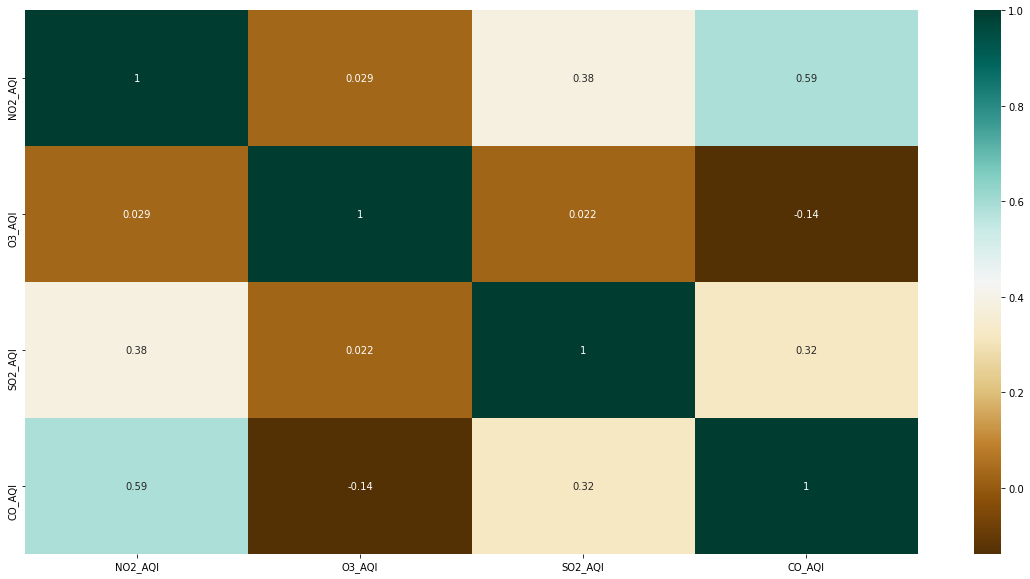

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
plt.figure(figsize=(20,10))
c= pollSt.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

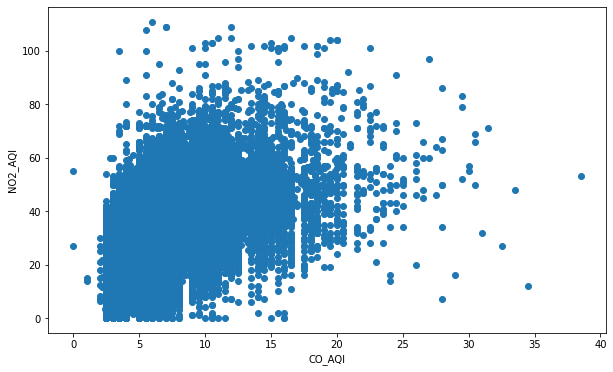

In [0]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(pollSt['CO_AQI'], pollSt['NO2_AQI'])
ax.set_xlabel('CO_AQI')
ax.set_ylabel('NO2_AQI')
plt.show()

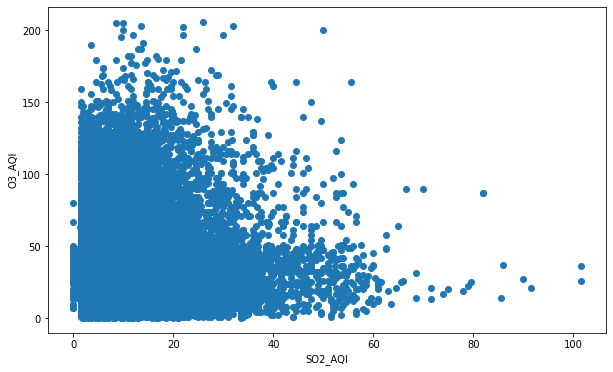

In [0]:
# Plotting a scatter plot
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(pollSt['SO2_AQI'], pollSt['O3_AQI'])
ax.set_xlabel('SO2_AQI')
ax.set_ylabel('O3_AQI')
plt.show()

#Timeseries Analysis

In [0]:
from fbprophet import Prophet

In [0]:
data1 = (df.select("City","Date", "NO2 AQI").where(col("City")== 'San Diego').dropDuplicates(['Date'])).withColumnRenamed('Date', 'ds').withColumnRenamed('NO2 AQI', 'y')
data2 = (df.select("City","Date", "O3 AQI").where(col("City")== 'San Diego').dropDuplicates(['Date'])).withColumnRenamed('Date', 'ds').withColumnRenamed('O3 AQI', 'y')
data3 = (df.select("City","Date", "SO2 AQI").where(col("City")== 'San Diego').dropDuplicates(['Date'])).withColumnRenamed('Date', 'ds').withColumnRenamed('SO2 AQI', 'y')
data4 = (df.select("City","Date", "CO AQI").where(col("City")== 'San Diego').dropDuplicates(['Date'])).withColumnRenamed('Date', 'ds').withColumnRenamed('CO AQI', 'y')

In [0]:
data1.agg({"ds": "max"}).collect()[0]

Out[41]: Row(max(ds)=datetime.date(2011, 6, 30))

In [0]:
data1.explain()

== Physical Plan ==
AdaptiveSparkPlan isFinalPlan=false
+- Project [City#18971, Date#7820 AS ds#18639, NO2 AQI#18973 AS y#18643]
   +- SortAggregate(key=[Date#7820], functions=[finalmerge_first(merge first#18976, valueSet#18977) AS first(City#7819)()#18970, finalmerge_first(merge first#18980, valueSet#18981) AS first(NO2 AQI#7825)()#18972])
      +- Sort [Date#7820 ASC NULLS FIRST], false, 0
         +- Exchange hashpartitioning(Date#7820, 200), ENSURE_REQUIREMENTS, [id=#16746]
            +- SortAggregate(key=[Date#7820], functions=[partial_first(City#7819, false) AS (first#18976, valueSet#18977), partial_first(NO2 AQI#7825, false) AS (first#18980, valueSet#18981)])
               +- Sort [Date#7820 ASC NULLS FIRST], false, 0
                  +- Filter (isnotnull(City#7819) AND (City#7819 = San Diego))
                     +- InMemoryTableScan [City#7819, Date#7820, NO2 AQI#7825], [isnotnull(City#7819), (City#7819 = San Diego)]
                           +- InMemoryRelation [Index#78

In [0]:
from pyspark.sql.types import *
final_schema = StructType([StructField('ds', DateType(), True), 
                           StructField('City', StringType(), True),
                           StructField('y', DoubleType(), True),
                           StructField('yhat', DoubleType(), True)])

In [0]:
from pyspark.sql.functions import pandas_udf, PandasUDFType

@pandas_udf(final_schema, PandasUDFType.GROUPED_MAP)
def pollution_forcast(Pre_data):
  model = Prophet(growth='linear',seasonality_mode='multiplicative',daily_seasonality=True,weekly_seasonality=True,yearly_seasonality=True)
  model.fit(Pre_data)
  future_pd = model.make_future_dataframe(periods = 370, freq = 'd')
  forcast_pd = model.predict(future_pd)
  f_pd = forcast_pd[['ds','yhat']].set_index('ds')
  s_pd = Pre_data[['ds','City','y']].set_index('ds')
  
  final_df = f_pd.join(s_pd, how = 'left')
  final_df.reset_index(level=0, inplace = True)
  final_df['City'] = Pre_data['City'].iloc[0]
  return final_df[ ['ds','City','y','yhat'] ]

  


In [0]:
result = (((data1.groupBy('City').apply(pollution_forcast)).withColumnRenamed("y","NO2").withColumnRenamed("yhat","NO2_Pred")).join(((data2.groupBy('City').apply(pollution_forcast)).withColumnRenamed("y","O3").withColumnRenamed("yhat","O3_Pred").drop('City')),'ds').join(((data3.groupBy('City').apply(pollution_forcast)).withColumnRenamed("y","SO2").withColumnRenamed("yhat","So2_Pred").drop('City')),'ds').join(((data3.groupBy('City').apply(pollution_forcast)).withColumnRenamed("y","CO").withColumnRenamed("yhat","CO_Pred").drop('City')),'ds'))

/databricks/spark/python/pyspark/sql/pandas/group_ops.py:81: UserWarning: It is preferred to use 'applyInPandas' over this API. This API will be deprecated in the future releases. See SPARK-28264 for more details.
  warnings.warn(


In [0]:
result.cache()

Out[46]: DataFrame[ds: date, City: string, NO2: double, NO2_Pred: double, O3: double, O3_Pred: double, SO2: double, So2_Pred: double, CO: double, CO_Pred: double]

In [0]:
result.count()

Out[47]: 4511

In [0]:
result.agg({"ds": "max"}).collect()[0]

Out[48]: Row(max(ds)=datetime.date(2012, 7, 4))

In [0]:
display(result.orderBy('ds',ascending=True).tail(400))

ds City NO2 NO2_Pred O3 O3_Pred SO2 So2_Pred CO CO_Pred 2011-06-01 San Diego 28.0 17.592869112693467 38.0 37.007968137835185 1.0 0.021317980699387132 1.0 0.021317980699387132 2011-06-02 San Diego 29.0 17.717877675720853 36.0 37.39707005293247 1.0 0.014712263283591091 1.0 0.014712263283591091 2011-06-03 San Diego 30.0 17.745392564704733 36.0 36.73421544309527 3.0 0.009749615840829225 3.0 0.009749615840829225 2011-06-04 San Diego 17.0 14.329857280642704 37.0 39.23659207216795 1.0 0.004220535207355953 1.0 0.004220535207355953 2011-06-05 San Diego 25.0 12.892818187953315 34.0 40.09455752417882 1.0 -0.00166753685022128 1.0 -0.00166753685022128 2011-06-06 San Diego 17.0 17.878738043921086 33.0 35.30923296293009 1.0 -0.009051067413696455 1.0 -0.009051067413696455 2011-06-07 San Diego 24.0 18.303752768349383 36.0 34.84154643887143 1.0 -0.016850480577369067 1.0 -0.016850480577369067 2011-06-08 San Diego 12.0 17.21001269265186 33.0 35.61748774829795 1.0 -0.019210127001682765 1.0 -0.019210127001682765 2011-06-09 San Diego 13.0 17.343226755356646 36.0 36.02579971341562 1.0 -0.02369447052771188 1.0 -0.02369447052771188 2011-06-10 San Diego 9.0 17.376113895168157 40.0 35.39102047776722 1.0 -0.030538902060994345 1.0 -0.030538902060994345 2011-06-11 San Diego 8.0 13.968340595322324 40.0 37.92951816995614 1.0 -0.037263694706534047 1.0 -0.037263694706534047 2011-06-12 San Diego 7.0 12.537037140263259 39.0 38.82956300484643 1.0 -0.04562502315085864 1.0 -0.04562502315085864 2011-06-13 San Diego 12.0 17.523142562298297 30.0 34.09007292748913 1.0 -0.05992654947824529 1.0 -0.05992654947824529 2011-06-14 San Diego 16.0 17.955822934579746 30.0 33.67118896573246 3.0 -0.06984489950398534 3.0 -0.06984489950398534 2011-06-15 San Diego 14.0 16.874796661509695 30.0 34.49654539907188 1.0 -0.06136196999619173 1.0 -0.06136196999619173 2011-06-16 San Diego 14.0 17.023409291083105 31.0 34.95265497514723 1.0 -0.06351502212977848 1.0 -0.06351502212977848 2011-06-17 San Diego 11.0 17.07617817579009 36.0 34.36195479504158 1.0 -0.07198994774752324 1.0 -0.07198994774752324 2011-06-18 San Diego 8.0 13.69649238947137 39.0 36.93935005050682 1.0 -0.07963170064994458 1.0 -0.07963170064994458 2011-06-19 San Diego 4.0 12.295428933264988 37.0 37.87078006408504 1.0 -0.09017388999957772 1.0 -0.09017388999957772 2011-06-20 San Diego 10.0 17.30868876173945 30.0 33.153131017654765 1.0 -0.11110070700972778 1.0 -0.11110070700972778 2011-06-21 San Diego 14.0 17.77673682017036 42.0 32.74634624456014 1.0 -0.12285746818892446 1.0 -0.12285746818892446 2011-06-22 San Diego 19.0 16.735170315259882 41.0 33.57270208690461 1.0 -0.1032749361061335 1.0 -0.1032749361061335 2011-06-23 San Diego 19.0 16.92338004069458 36.0 34.01786507584387 1.0 -0.10287303876641593 1.0 -0.10287303876641593 2011-06-24 San Diego 11.0 17.016239529530566 36.0 33.40390761462641 1.0 -0.11279635541982078 1.0 -0.11279635541982078 2011-06-25 San Diego 8.0 13.679612441604105 40.0 35.94631606317436 1.0 -0.12122084294910386 1.0 -0.12122084294910386 2011-06-26 San Diego 13.0 12.317506454337458 38.0 36.83099627227234 1.0 -0.13386187650623932 1.0 -0.13386187650623932 2011-06-27 San Diego 27.0 17.35962975463347 32.0 32.055290742289536 1.0 -0.16138644589003237 1.0 -0.16138644589003237 2011-06-28 San Diego 13.0 17.857273144166367 31.0 31.581554751513774 1.0 -0.17500875035071267 1.0 -0.17500875035071267 2011-06-29 San Diego 8.0 16.84173212917027 30.0 32.333364310208566 3.0 -0.14440657254655243 3.0 -0.14440657254655243 2011-06-30 San Diego 19.0 17.04855598756405 24.0 32.69816932870432 1.0 -0.14157871665268185 1.0 -0.14157871665268185 2011-07-01 San Diego null 17.153373201498372 null 32.00020292362247 null -0.15312285691943162 null -0.15312285691943162 2011-07-02 San Diego null 13.825189119410645 null 34.45787968108827 null -0.16253874909786717 null -0.16253874909786717 2011-07-03 San Diego null 12.461852072632846 null 35.25917067991724 null -0.17751495052076316 null -0.17751495052076316 2011-07-04 San Diego null 17.488197570615682 nu

In [0]:
display(result.select('City',year('ds'),'NO2','NO2_Pred','O3','O3_Pred','SO2','So2_Pred','CO','CO_Pred').orderBy('year(ds)', ascending=True))

City year(ds) NO2 NO2_Pred O3 O3_Pred SO2 So2_Pred CO CO_Pred San Diego 2000 29.0 36.49374834187708 41.0 39.39895685406228 10.0 12.675827381697571 10.0 12.675827381697571 San Diego 2000 33.0 22.298679663586512 50.0 39.502300373863505 17.0 8.05290754664803 17.0 8.05290754664803 San Diego 2000 35.0 44.0334032379835 47.0 34.87293849060629 6.0 14.107012793119612 6.0 14.107012793119612 San Diego 2000 19.0 45.21903281237481 35.0 34.546506445576384 7.0 14.550808207009096 7.0 14.550808207009096 San Diego 2000 54.0 40.97877004576409 28.0 37.05999446464436 13.0 8.87028017388417 13.0 8.87028017388417 San Diego 2000 25.0 20.051026478944713 50.0 40.42467394644121 27.0 8.446692014789186 27.0 8.446692014789186 San Diego 2000 37.0 44.28258846368465 29.0 35.41088023341409 6.0 12.341454327576052 6.0 12.341454327576052 San Diego 2000 38.0 45.04463399967147 31.0 35.887534408643376 7.0 11.860779037803978 7.0 11.860779037803978 San Diego 2000 25.0 26.840345015770925 39.0 35.96947643525103 26.0 9.739031126337162 26.0 9.739031126337162 San Diego 2000 45.0 45.65294741454912 31.0 35.31360099312668 6.0 12.18142895785589 6.0 12.18142895785589 San Diego 2000 47.0 41.44973441185948 39.0 37.81730628268057 7.0 12.349626417501556 7.0 12.349626417501556 San Diego 2000 65.0 48.26751455546821 15.0 21.682587244448857 27.0 10.585115504468023 27.0 10.585115504468023 San Diego 2000 46.0 38.914113222300166 31.0 38.306069963103845 10.0 9.308411619568345 10.0 9.308411619568345 San Diego 2000 25.0 27.265849550932664 34.0 35.60174647995748 29.0 10.096055802084969 29.0 10.096055802084969 San Diego 2000 46.0 39.978379073436905 39.0 38.68680721984843 27.0 12.769556205990016 27.0 12.769556205990016 San Diego 2000 62.0 55.66282761302444 14.0 18.556493783406435 27.0 12.391893201246756 27.0 12.391893201246756 San Diego 2000 37.0 45.255761959552274 24.0 27.383371799489424 3.0 10.049522352418997 3.0 10.049522352418997 San Diego 2000 44.0 47.42528956416623 36.0 34.00156109348863 6.0 14.0914939823658 6.0 14.0914939823658 San Diego 2000 25.0 25.58996846663514 31.0 36.39971863836779 10.0 7.896649630856683 10.0 7.896649630856683 San Diego 2000 42.0 48.49983233608807 50.0 33.51996370279193 11.0 14.430423726884266 11.0 14.430423726884266 San Diego 2000 38.0 47.43447688107836 44.0 34.2308114335777 7.0 12.12068741683985 7.0 12.12068741683985 San Diego 2000 33.0 45.847672097167454 20.0 34.23733259780126 11.0 10.592808755280977 11.0 10.592808755280977 San Diego 2000 16.0 25.660533699560055 36.0 36.83098716374518 7.0 7.4045845681147 7.0 7.4045845681147 San Diego 2000 25.0 48.05087421434271 46.0 34.55526724627223 9.0 11.552184090001179 9.0 11.552184090001179 San Diego 2000 34.0 48.50021154845049 77.0 33.83147718671288 20.0 11.798314451700882 20.0 11.798314451700882 San Diego 2000 24.0 25.613210999077346 36.0 36.252623668876744 6.0 7.7164276008365364 6.0 7.7164276008365364 San Diego 2000 24.0 44.12937330903457 47.0 36.19548819908943 13.0 11.905776053184024 13.0 11.905776053184024 San Diego 2000 42.0 42.4824553778719 29.0 36.930570263119535 9.0 12.28076043335481 9.0 12.28076043335481 San Diego 2000 52.0 46.32660781163314 33.0 34.17759772954888 11.0 10.968667399811954 11.0 10.968667399811954 San Diego 2000 26.0 20.758434477670907 43.0 38.67593490644082 9.0 7.90256007812844 9.0 7.90256007812844 San Diego 2000 42.0 49.747188422096656 30.0 32.112294824692086 19.0 13.57555098157272 19.0 13.57555098157272 San Diego 2000 43.0 42.9881821563142 30.0 28.575653116367537 4.0 10.400598830561655 4.0 10.400598830561655 San Diego 2000 42.0 50.64170257097703 35.0 31.51451393956972 19.0 13.903381971513861 19.0 13.903381971513861 San Diego 2000 27.0 18.69137390418092 37.0 39.524616148435726 6.0 8.354486486800553 6.0 8.354486486800553 San Diego 2000 42.0 49.40048179957924 28.0 32.12303214179629 10.0 11.596756937057553 10.0 11.596756937057553 San Diego 2000 44.0 49.847204711041734 25.0 32.35781040473771 9.0 11.051447402622891 9.0 11.051447402622891 San Diego 2000 43.0 44.62964753993245 40.0 35.24852994403897 40.0 8

In [0]:
display(result.select('City','ds','NO2','NO2_Pred','SO2','So2_Pred').orderBy('ds',ascending=True))

City ds NO2 NO2_Pred SO2 So2_Pred San Diego 2000-01-01 31.0 48.715980872587075 3.0 9.54272771863725 San Diego 2000-01-02 37.0 47.02471007559653 4.0 10.045956715874743 San Diego 2000-01-03 49.0 54.383967774373886 6.0 11.352874597192576 San Diego 2000-01-04 62.0 55.28603558039423 10.0 11.796330620063799 San Diego 2000-01-05 66.0 54.0215316141296 7.0 9.899376407921972 San Diego 2000-01-06 52.0 54.46446632491431 6.0 9.539832398428644 San Diego 2000-01-07 57.0 54.73842520043145 14.0 9.89749840640755 San Diego 2000-01-08 52.0 50.12313018191174 13.0 10.126751791902208 San Diego 2000-01-09 65.0 48.26751455546821 27.0 10.585115504468023 San Diego 2000-01-10 80.0 55.445030746322786 9.0 11.849294010424192 San Diego 2000-01-11 58.0 56.15672331020736 11.0 12.244556940231147 San Diego 2000-01-12 39.0 54.69523533697784 4.0 10.287298444719017 San Diego 2000-01-13 101.0 54.93663251711588 7.0 9.87678336362228 San Diego 2000-01-14 100.0 55.00831608026159 9.0 10.189311029724145 San Diego 2000-01-15 52.0 50.194529231592114 16.0 10.375471576068504 San Diego 2000-01-16 52.0 48.14421346495216 7.0 10.795163359005643 San Diego 2000-01-17 41.0 55.13093162353189 4.0 12.02843363692088 San Diego 2000-01-18 62.0 55.66282761302444 27.0 12.391893201246756 San Diego 2000-01-19 54.0 54.03251547954141 7.0 10.39413788091143 San Diego 2000-01-20 33.0 54.11575328568894 6.0 9.954711604358332 San Diego 2000-01-21 30.0 54.041174536858 4.0 10.24526021069143 San Diego 2000-01-22 37.0 49.09483175113323 7.0 10.411481217303384 San Diego 2000-01-23 40.0 46.92292723418158 6.0 10.814623518242293 San Diego 2000-01-24 58.0 53.796442454240605 9.0 12.037162390013464 San Diego 2000-01-25 48.0 54.22807070616653 13.0 12.386270571962996 San Diego 2000-01-26 39.0 52.50806762848203 4.0 10.362122614562011 San Diego 2000-01-27 54.0 52.509843800531414 7.0 9.904090244856652 San Diego 2000-01-28 55.0 52.361571658567684 6.0 10.178895951825327 San Diego 2000-01-29 51.0 47.349809625560646 4.0 10.327260147646234 San Diego 2000-01-30 33.0 45.11713597512557 14.0 10.711881219173902 San Diego 2000-01-31 39.0 51.931497601442736 7.0 11.917937230206613 San Diego 2000-02-01 62.0 52.31011292109823 9.0 12.24360042173413 San Diego 2000-02-02 58.0 50.54126557866698 4.0 10.181206437175272 San Diego 2000-02-03 56.0 50.49678273052727 20.0 9.690659686151372 San Diego 2000-02-04 49.0 50.30547085729618 17.0 9.934560778988155 San Diego 2000-02-05 37.0 45.255761959552274 3.0 10.049522352418997 San Diego 2000-02-06 43.0 42.9881821563142 4.0 10.400598830561655 San Diego 2000-02-07 61.0 49.76934399341688 9.0 11.576583202713108 San Diego 2000-02-08 56.0 50.12273882778577 9.0 11.867533303155817 San Diego 2000-02-09 44.0 48.33639083469886 7.0 9.758775204544142 San Diego 2000-02-10 31.0 48.282138805779105 49.0 9.231489719978892 San Diego 2000-02-11 42.0 48.09082223388946 4.0 9.444787532453454 San Diego 2000-02-12 38.0 43.053877235417836 4.0 9.531671010347113 San Diego 2000-02-13 33.0 40.81057637824949 9.0 9.859895150670189 San Diego 2000-02-14 32.0 47.6266121420778 7.0 11.022045597085267 San Diego 2000-02-15 39.0 48.03173946183816 7.0 11.300067961447832 San Diego 2000-02-16 34.0 46.31326532017526 43.0 9.17210200167431 San Diego 2000-02-17 38.0 46.342125038882564 4.0 8.64025133269249 San Diego 2000-02-18 47.0 46.24982591098647 10.0 8.859613718372785 San Diego 2000-02-19 41.0 41.3290165045635 17.0 8.95890152783344 San Diego 2000-02-20 38.0 39.21553731934537 20.0 9.3077513332702 San Diego 2000-02-21 33.0 46.17164999313197 6.0 10.50160496135521 San Diego 2000-02-22 45.0 46.73059815494203 7.0 10.813267346779083 San Diego 2000-02-23 29.0 45.17601242056572 11.0 8.71259995259025 San Diego 2000-02-24 37.0 45.374870376004004 4.0 8.221504302350494 San Diego 2000-02-25 43.0 45.456293716304955 4.0 8.489939326298279 San Diego 2000-02-26 68.0 40.71119077510483 4.0 8.641232718530413 San Diego 2000-02-27 44.0 38.76921868946143 4.0 9.045870896052788 San Diego 2000-02-28 31.0 45.88675673520228 4.0 10.301213330240861 San Diego 2000-02-29 10

In [0]:
display(result.select('City','ds','O3','O3_Pred','CO','CO_Pred').orderBy('ds',ascending=True))

City ds O3 O3_Pred CO CO_Pred San Diego 2000-01-01 33.0 20.599836212933234 3.0 9.54272771863725 San Diego 2000-01-02 31.0 21.569307332707318 4.0 10.045956715874743 San Diego 2000-01-03 14.0 17.333485731665764 6.0 11.352874597192576 San Diego 2000-01-04 12.0 17.077885481330405 10.0 11.796330620063799 San Diego 2000-01-05 12.0 17.970122861467306 7.0 9.899376407921972 San Diego 2000-01-06 13.0 18.525592872842022 6.0 9.539832398428644 San Diego 2000-01-07 17.0 18.122447369650686 14.0 9.89749840640755 San Diego 2000-01-08 12.0 20.65438926699133 13.0 10.126751791902208 San Diego 2000-01-09 15.0 21.682587244448857 27.0 10.585115504468023 San Diego 2000-01-10 26.0 17.513354908409667 9.0 11.849294010424192 San Diego 2000-01-11 19.0 17.34602912211653 11.0 12.244556940231147 San Diego 2000-01-12 15.0 18.3431265036289 4.0 10.287298444719017 San Diego 2000-01-13 6.0 19.016569091896134 7.0 9.87678336362228 San Diego 2000-01-14 5.0 18.741941494230343 9.0 10.189311029724145 San Diego 2000-01-15 19.0 21.416925949914305 16.0 10.375471576068504 San Diego 2000-01-16 2.0 22.59354992504807 7.0 10.795163359005643 San Diego 2000-01-17 3.0 18.569860196315922 4.0 12.02843363692088 San Diego 2000-01-18 14.0 18.556493783406435 27.0 12.391893201246756 San Diego 2000-01-19 12.0 19.7086704861114 7.0 10.39413788091143 San Diego 2000-01-20 13.0 20.53303371539119 6.0 9.954711604358332 San Diego 2000-01-21 23.0 20.40124243742732 4.0 10.24526021069143 San Diego 2000-01-22 30.0 23.214090964054826 7.0 10.411481217303384 San Diego 2000-01-23 18.0 24.514120041045256 6.0 10.814623518242293 San Diego 2000-01-24 7.0 20.591302192711584 9.0 12.037162390013464 San Diego 2000-01-25 20.0 20.66830673428623 13.0 12.386270571962996 San Diego 2000-01-26 24.0 21.89431477876566 4.0 10.362122614562011 San Diego 2000-01-27 21.0 22.772446855612614 7.0 9.904090244856652 San Diego 2000-01-28 17.0 22.672647123041695 6.0 10.178895951825327 San Diego 2000-01-29 36.0 25.5014322675376 4.0 10.327260147646234 San Diego 2000-01-30 31.0 26.79479881556725 14.0 10.711881219173902 San Diego 2000-01-31 25.0 22.83784259289243 7.0 11.917937230206613 San Diego 2000-02-01 13.0 22.8686328601939 9.0 12.24360042173413 San Diego 2000-02-02 30.0 24.033759322769587 4.0 10.181206437175272 San Diego 2000-02-03 31.0 24.83625303005399 20.0 9.690659686151372 San Diego 2000-02-04 31.0 24.647668882053196 17.0 9.934560778988155 San Diego 2000-02-05 24.0 27.383371799489424 3.0 10.049522352418997 San Diego 2000-02-06 30.0 28.575653116367537 4.0 10.400598830561655 San Diego 2000-02-07 18.0 24.507204152654012 9.0 11.576583202713108 San Diego 2000-02-08 10.0 24.433528874679745 9.0 11.867533303155817 San Diego 2000-02-09 27.0 25.50016372535105 7.0 9.758775204544142 San Diego 2000-02-10 30.0 26.211045745365162 49.0 9.231489719978892 San Diego 2000-02-11 30.0 25.939761790514964 4.0 9.444787532453454 San Diego 2000-02-12 34.0 28.610355822442802 4.0 9.531671010347113 San Diego 2000-02-13 32.0 29.750654200265075 9.0 9.859895150670189 San Diego 2000-02-14 15.0 25.639609248112563 7.0 11.022045597085267 San Diego 2000-02-15 19.0 25.548282036335685 7.0 11.300067961447832 San Diego 2000-02-16 35.0 26.618781557740895 43.0 9.17210200167431 San Diego 2000-02-17 31.0 27.353140325605615 4.0 8.64025133269249 San Diego 2000-02-18 7.0 27.123802702340765 10.0 8.859613718372785 San Diego 2000-02-19 34.0 29.860035932561196 17.0 8.95890152783344 San Diego 2000-02-20 33.0 31.081554964284848 20.0 9.3077513332702 San Diego 2000-02-21 35.0 27.059832210924853 6.0 10.50160496135521 San Diego 2000-02-22 31.0 27.077749622423873 7.0 10.813267346779083 San Diego 2000-02-23 34.0 28.27035665829368 11.0 8.71259995259025 San Diego 2000-02-24 30.0 29.134350393260902 4.0 8.221504302350494 San Diego 2000-02-25 28.0 29.037894927806075 4.0 8.489939326298279 San Diego 2000-02-26 27.0 31.912720567807476 4.0 8.641232718530413 San Diego 2000-02-27 36.0 33.26812271141064 4.0 9.045870896052788 San Diego 2000-02-28 26.0 29.366300439628123 4.0 10.301213330240861 San Di

In [0]:
new = (result.dropna())

In [0]:
new.count()

Out[17]: 4141

In [0]:
import pyspark.sql.functions as psf
from pyspark.ml.evaluation import RegressionEvaluator
def Accuracy(expected_col, actual_col):
  regressionEvaluator = RegressionEvaluator(predictionCol=expected_col, labelCol=actual_col)
  r2 = (regressionEvaluator.setMetricName("r2").evaluate(new))
  rmse= new.withColumn('error', psf.pow(psf.col(actual_col)-psf.col(expected_col),psf.lit(2))).groupBy('City').agg(psf.avg(psf.col('error')).alias('mse')).withColumn('rmse',psf.sqrt(psf.col('mse'))).withColumn('R2 Value',lit(r2))
  return(rmse)
display(Accuracy("NO2_Pred","NO2"))

City mse rmse R2 Value San Diego 148.79434845839467 12.198128891694605 0.43200843404262523

In [0]:
display(Accuracy("O3_Pred","O3"))

City mse rmse R2 Value San Diego 54.40534742562648 7.375998063016725 0.45241005369046694

In [0]:
display(Accuracy("So2_Pred","SO2"))

City mse rmse R2 Value San Diego 30.49080362643493 5.521847845281046 0.24385284328927936

In [0]:
display(Accuracy("CO_Pred","CO"))

City mse rmse R2 Value San Diego 30.49080362643493 5.521847845281046 0.24385284328927936